# Questo è il file principale dove verranno effettuate delle analisi complete su tutti i dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
# Add count values on top of each bar
def add_count_on_bars(ax):
    # Add count values on top of each bar
    for p in ax.patches:
     ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

##### dataset dei generi dei film

In [3]:
genres_df = pd.read_csv("Main_data/genres.csv")
ids_movies = genres_df['id'].unique()

# visualizziamo i genere per gruppo di id
grouped_genres_df = genres_df.groupby('id')["genre"].agg(list).reset_index()

# selezioniamo i film che hanno il genere Comedy
grouped_genres_df[grouped_genres_df["genre"].apply(lambda x: "Comedy" in x)].reset_index(drop = True)
grouped_genres_df

print(len(ids_movies))


676491


##### dataset dei paesi di produzione

In [4]:
countries_df = pd.read_csv("Main_data/countries.csv")
grouped_countries_df = countries_df.groupby('id')["country"].agg(list).reset_index()
grouped_countries_df


,id,country
0,1000001,"[UK, USA]"
1,1000002,[South Korea]
2,1000003,[USA]
3,1000004,"[Germany, USA]"
4,1000005,"[Hong Kong, USA]"
...,...,...
617187,1941593,[China]
617188,1941594,[USA]
617189,1941595,[USA]
617190,1941596,[China]


In [5]:
# analizziamo brevemente il dataset dei paesi di produzione
x = countries_df["country"].unique()
x.tolist()
# calcolo quanti elementi ci sono 
len(x)

# controllo se ci sono paesi con più nomi
s = pd.Series(x)
s[s.str.contains("United", case = False, na = False)]

33                     United Arab Emirates
160             United Republic of Tanzania
238    United States Minor Outlying Islands
dtype: object

### eseguiamo delle analisi su un dataset composto per analizzare le correlazioni tra generi dei film

In [6]:
# uniamo i film con i loro generi
movies_df_norm = pd.read_csv("File_normalizzati/movies_normalized.csv")
movies_w_genres_df = pd.merge(movies_df_norm, grouped_genres_df, on = "id")
movies_w_genres_df

,id,name,date,description,minute,rating,genre
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,"[Comedy, Adventure]"
1,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"[Comedy, Thriller, Drama]"
2,1000003,Everything Everywhere All at Once,2022.0,An aging Chinese immigrant is swept up in an i...,140.0,4.30,"[Science Fiction, Adventure, Comedy, Action]"
3,1000004,Fight Club,1999.0,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,[Drama]
4,1000005,La La Land,2016.0,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"[Drama, Comedy, Music, Romance]"
...,...,...,...,...,...,...,...
676486,1941559,你谁啊,NaN,NaN,67.0,NaN,[Comedy]
676487,1941563,数到三,NaN,NaN,NaN,NaN,[Drama]
676488,1941566,日本統一35,NaN,The leaders of the Kyowakai are surprised that...,80.0,NaN,[Crime]
676489,1941569,日本統一38,NaN,"Obuchi, the young leader of Gasonkai, a group ...",70.0,NaN,[Crime]


In [7]:
# eseguiamo una breve analisi esplorativa sul numero di film per genere ad esempio le commedie
movies_w_genres_df[movies_w_genres_df["genre"].apply(lambda x: "Comedy" in x)].reset_index(drop = True)
tot_comedy = movies_w_genres_df["genre"].apply(lambda x: "Comedy" in x).sum()
print(f"Totale delle commedie: {tot_comedy}")

Totale delle commedie: 140636


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Documentary'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Romance'),
  Text(6, 0, 'Thriller'),
  Text(7, 0, 'Music'),
  Text(8, 0, 'Action'),
  Text(9, 0, 'Crime'),
  Text(10, 0, 'Family'),
  Text(11, 0, 'TV Movie'),
  Text(12, 0, 'Adventure'),
  Text(13, 0, 'Fantasy'),
  Text(14, 0, 'Mystery'),
  Text(15, 0, 'Science Fiction'),
  Text(16, 0, 'History'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western')])

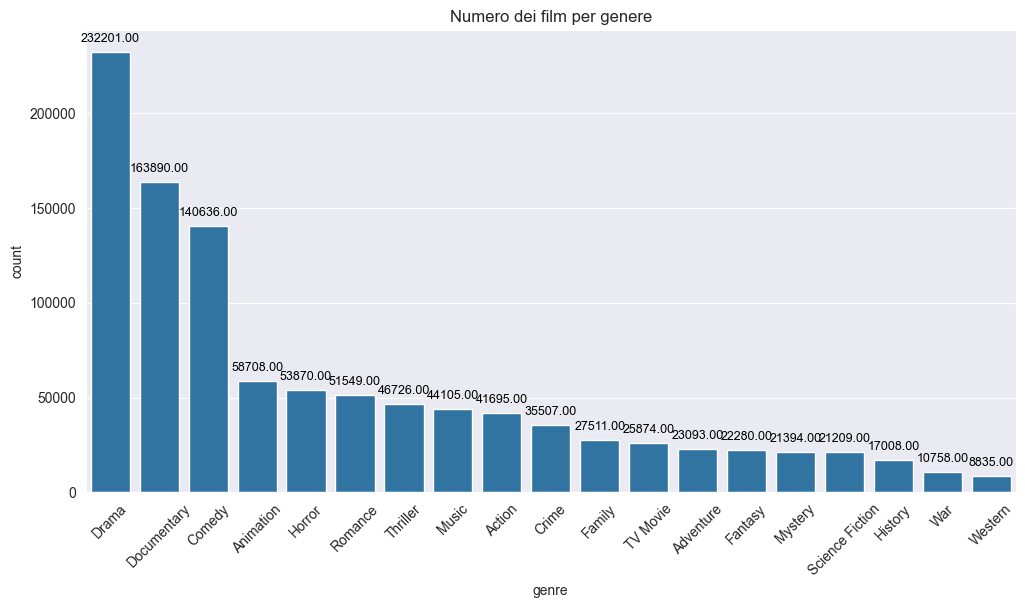

In [8]:
# mostriamo in un grafico il numero di film per genere
plt.figure(figsize=(12,6))
ax = sns.countplot(data = movies_w_genres_df.explode("genre"), x = "genre", order = movies_w_genres_df.explode("genre")["genre"].value_counts().index)
plt.title("Numero dei film per genere")
add_count_on_bars(ax)
plt.xticks(rotation = 45)


Il genre più apprezzato è Documentary con una valutazione media di 3.52


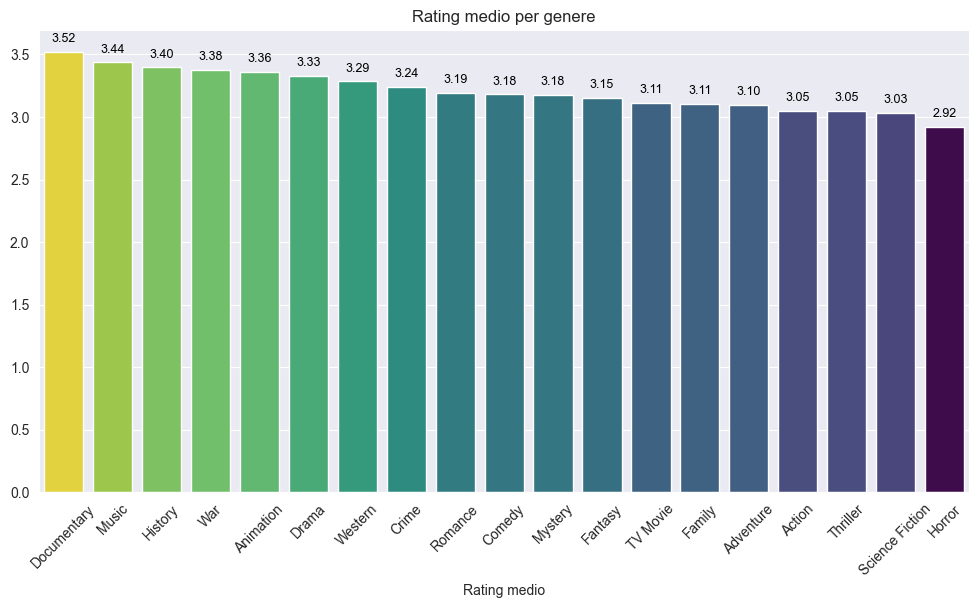

In [9]:
# mostriamo un grafico con il genere più apprezzato facendo una media dei rating
exploded_genres_df = movies_w_genres_df.explode("genre").reset_index(drop = True).copy()
genre_ratings_df = exploded_genres_df.groupby("genre")["rating"].mean().sort_values(ascending = False)

plt.figure(figsize= (12, 6))
ax = sns.barplot(y = genre_ratings_df.values, x = genre_ratings_df.index, hue = genre_ratings_df, palette = "viridis", order= genre_ratings_df.index, legend = False)
plt.title("Rating medio per genere")
plt.xlabel("Rating medio")
plt.xticks(rotation = 45)

add_count_on_bars(ax)

most_appreciated_genre = genre_ratings_df.index[0]
average_rating_most_appreciated = genre_ratings_df.iloc[0]
print(f"\nIl genre più apprezzato è {most_appreciated_genre} con una valutazione media di {average_rating_most_appreciated:.2f}")


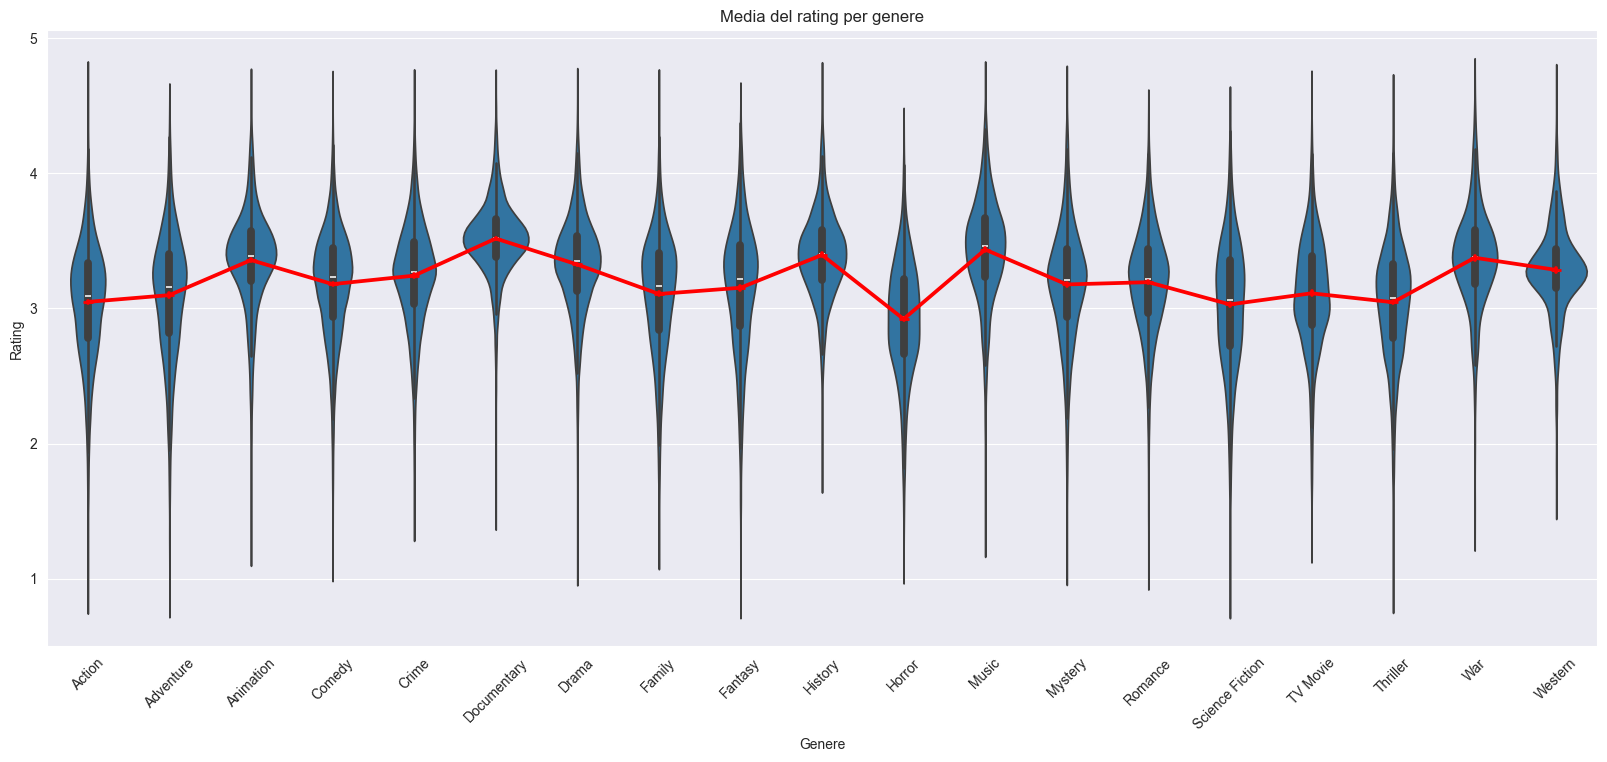

In [10]:
# utilizziamo un grafico a violino per mostrare la distribuzione del rating per ogni genere
plt.figure(figsize = (20, 8))

genre_order = sorted(exploded_genres_df['genre'].unique())

ax = sns.violinplot(data = exploded_genres_df, x = "genre", y = "rating", order = genre_order)

# Sovrapponi un pointplot per mostrare la media
# Useremo 'estimator' per calcolare la media, 'markers' per lo stile della linea,
# 'scale' per la sua lunghezza, e 'errorbar=None' (o 'ci=None' per versioni più vecchie di Seaborn)
# per non mostrare gli intervalli di confidenza.
# 'join=False' evita che le medie dei diversi generi vengano collegate da una linea.
sns.pointplot(data=exploded_genres_df,
              x="genre", y="rating",
              estimator='mean',
              markers='_',
              color='red',
              ax=ax,
              order=genre_order)

plt.title("Media del rating per genere")
plt.xlabel("Genere")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show()

#### eseguiamo un'analisi sui generi per vedere qual è il più apprezzato in determinati range di periodo

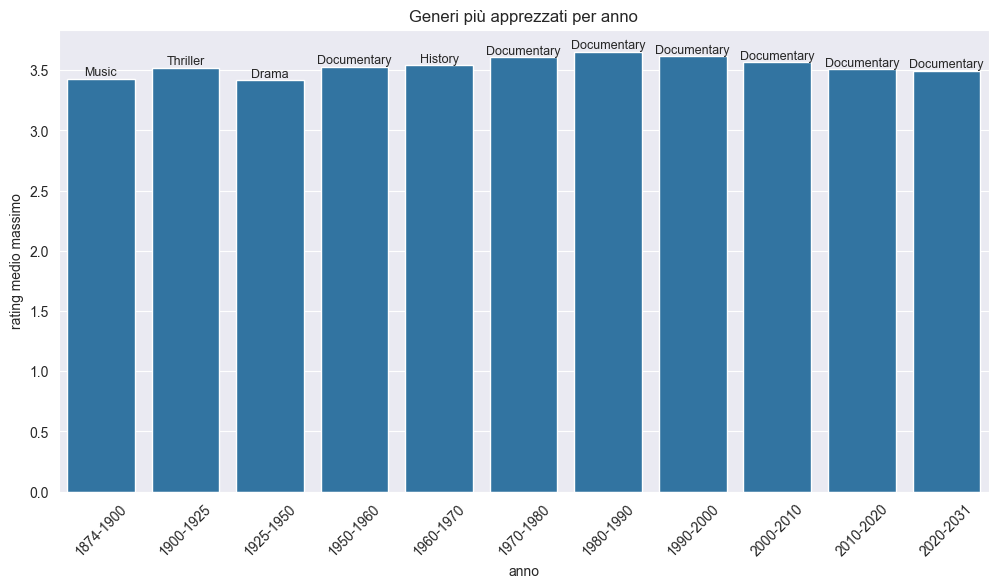

In [11]:
# creazione di un range di anni per analizzare i film in base al loro anno di uscita
year_range = [movies_w_genres_df["date"].min(), 1900, 1925, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, float("inf")]
labels = ["1874-1900", "1900-1925", "1925-1950", "1950-1960", "1960-1970", "1970-1980", "1980-1990", "1990-2000", "2000-2010", "2010-2020", "2020-2031"]

movies_w_genres_t_range_df = movies_w_genres_df.copy()
# nuova colonna per il range di anni
movies_w_genres_t_range_df["year_range"] = pd.cut(movies_w_genres_df["date"], bins = year_range, labels = labels, right = False)

# divisione dei generi dei film
exploded_genre_yr = movies_w_genres_t_range_df.explode("genre").copy()

# calcolo della media dei rating per ogni genere e range di anni
avg_rating_per_genre_range = exploded_genre_yr.groupby(["year_range", "genre"], observed = True)["rating"].mean().reset_index()

# indice per ottenere il rating massimo per selezionare il record corretto
idx = avg_rating_per_genre_range.groupby("year_range", observed=True)["rating"].idxmax()
top_genre_per_year = avg_rating_per_genre_range.loc[idx]

plt.figure(figsize = (12,6))
ax = sns.barplot(data = top_genre_per_year, x = "year_range", y = "rating")

# blocco di codice per stampare il genere sopra le barre  ------ NOTE: questo blocco di codice è stato realizzato in parte grazie all'aiuto dell'AI
for i, bar in enumerate(ax.patches):
    # Prendi la riga di dati corrispondente alla barra i-esima
    try:
        row_data = top_genre_per_year.iloc[i]
        genre_label = row_data['genre'] # Prendi il genere da quella riga

        ax.text(
            bar.get_x() + bar.get_width() / 2., # Posizione X (centro della barra)
            bar.get_height(),                   # Posizione Y (cima della barra)
            genre_label,                        # Testo da mostrare (il genere)
            ha='center',                        # Allineamento orizzontale
            va='bottom',                        # Allineamento verticale
            rotation=0,                         # Ruota leggermente
            fontsize=9                          # Dimensione font
        )
    except IndexError:
        print(f"Warning: Mismatch between number of bars ({len(ax.patches)}) and data rows ({len(top_genre_per_year)}) at index {i}. Skipping annotation.")


plt.title("Generi più apprezzati per anno")
plt.xlabel("anno")
plt.ylabel("rating medio massimo")
plt.xticks(rotation = 45)
plt.show()
    


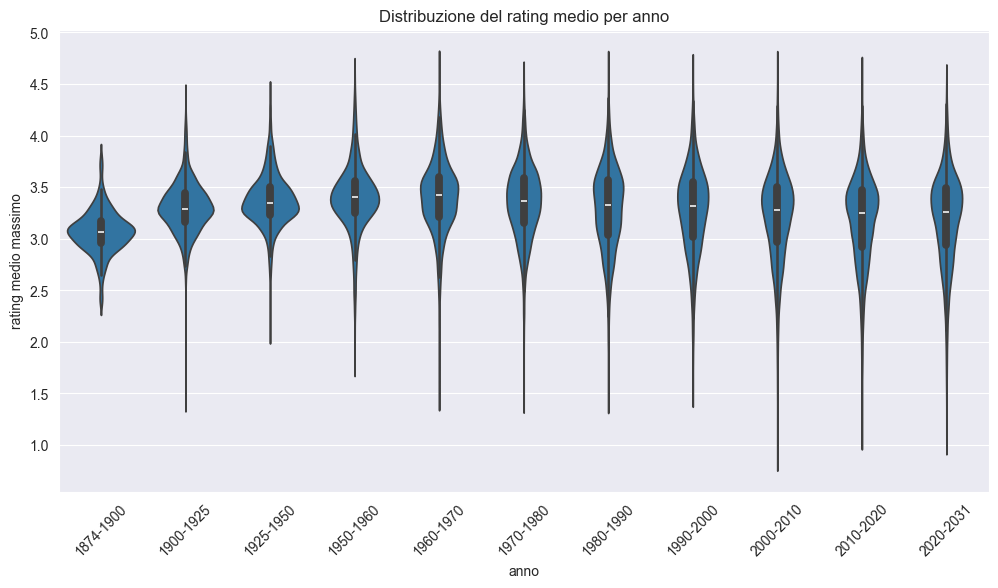

In [12]:
#violin plot diviso per range di anno
plt.figure(figsize = (12, 6))
ax = sns.violinplot(data = movies_w_genres_t_range_df, x = "year_range", y = "rating")
plt.title("Distribuzione del rating medio per anno")
plt.xlabel("anno")
plt.ylabel("rating medio massimo")
plt.xticks(rotation = 45)
plt.show()

##### calcoliamo l'andamento del rating per anno

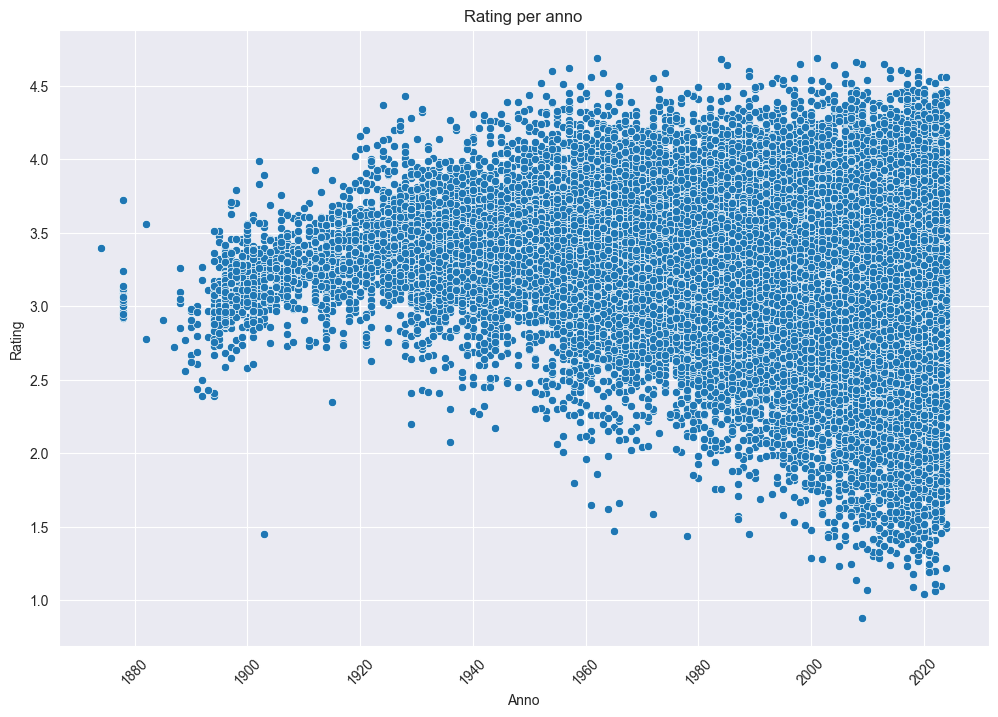

In [13]:
# data di uscita vs rating usando uno scatterplot
plt.figure(figsize = (12, 8))
ax = sns.scatterplot(data = movies_w_genres_df, x = "date", y = "rating")

plt.title("Rating per anno")
plt.xlabel("Anno")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show()

##### quali sono i generi che hanno durata maggiore

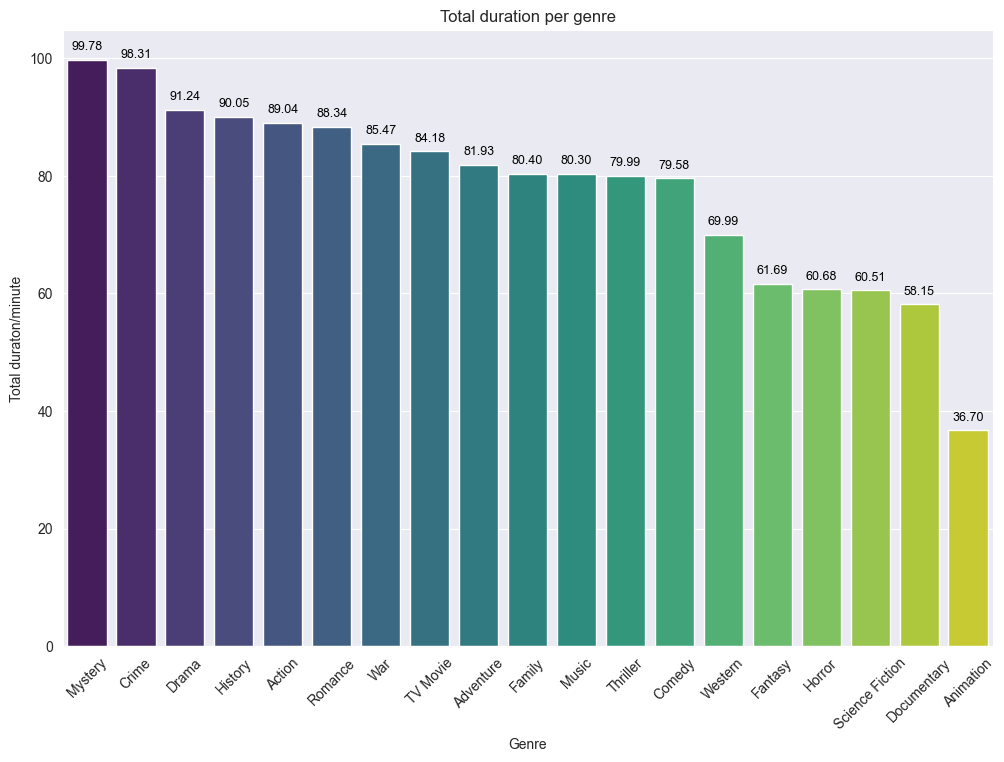

In [14]:
# raggruppiamo i generi e calcoliamo la media della durata per ognuno di essi così da trovare il genere che ha una durata maggiore
genre_duration_df = exploded_genres_df.groupby("genre")["minute"].mean()
genre_duration_df = genre_duration_df.sort_values(ascending = False)

plt.figure(figsize = (12, 8))
ax = sns.barplot(x = genre_duration_df.index, y = genre_duration_df.values, hue = genre_duration_df.index, palette = "viridis", order = genre_duration_df.index)
plt.title("Total duration per genre")
plt.xlabel("Genre")
plt.ylabel("Total duraton/minute")
plt.xticks(rotation = 45)

add_count_on_bars(ax)

plt.show()

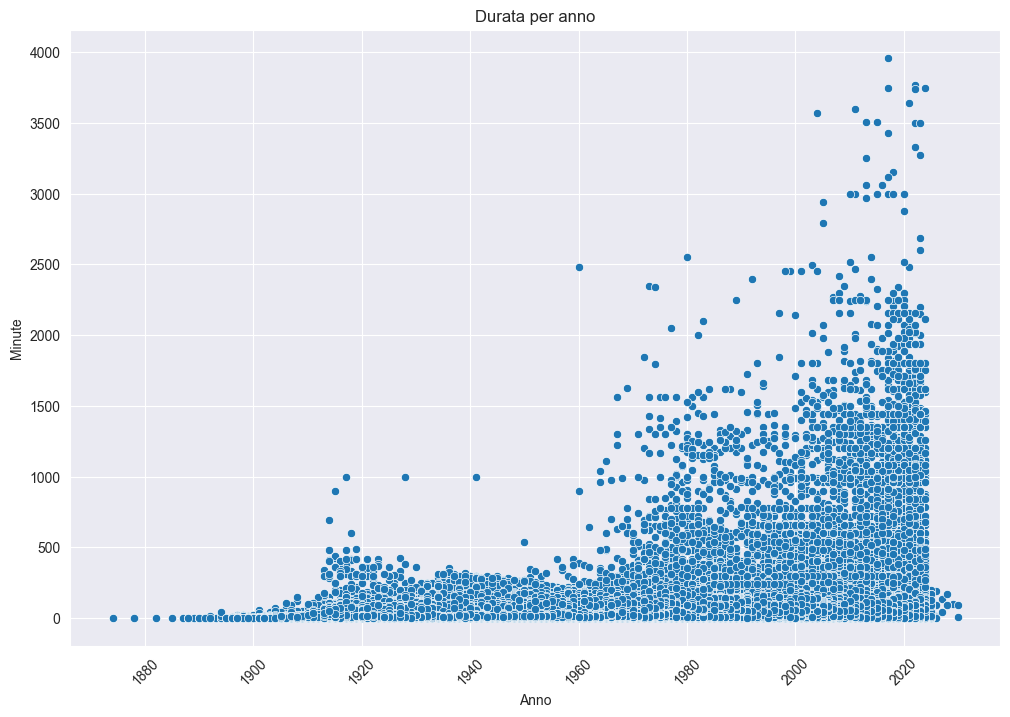

In [15]:
# proiezione di come è variato il minutaggio nel tempo
plt.figure(figsize = (12, 8))
# selezioniamo un minutaggio massimo per evitare outliers o film con una durata eccessiva per non disturbare la visualizzazione
movies_duration_df = movies_w_genres_df[movies_w_genres_df["minute"] < 4000]
ax = sns.scatterplot(data = movies_duration_df, x = "date", y = "minute")
plt.title("Durata per anno")
plt.xlabel("Anno")
plt.ylabel("Minute")
plt.xticks(rotation = 45)
plt.show()

##### altre analisi da effettuare sul dataset movies_w_genres_df

In [16]:
# di che genere sono i film che hanno una maggiore durata
cols = ["name", "minute","genre", "date"]
# selezioniamo un valore per determinare quali sono i film che hanno una durata maggiore ad esempio 10000 minuti
movies_w_genres_df.loc[movies_w_genres_df["minute"] > 10000][cols]


,name,minute,genre,date
27574,Logistics,51420.0,[Documentary],2011.0
71193,Cinématon,12480.0,[Documentary],1978.0
92434,Modern Times Forever,14400.0,[Documentary],2011.0
181510,Al Zeer Salem,72000.0,[Drama],2000.0
285645,Svalbard minutt for minutt,13319.0,[Documentary],2020.0
384426,Eighteen Springs,58800.0,[Drama],2002.0


#### calcoliamo quale dovrebbe essere la durata di un film per ogni genre in base al rating

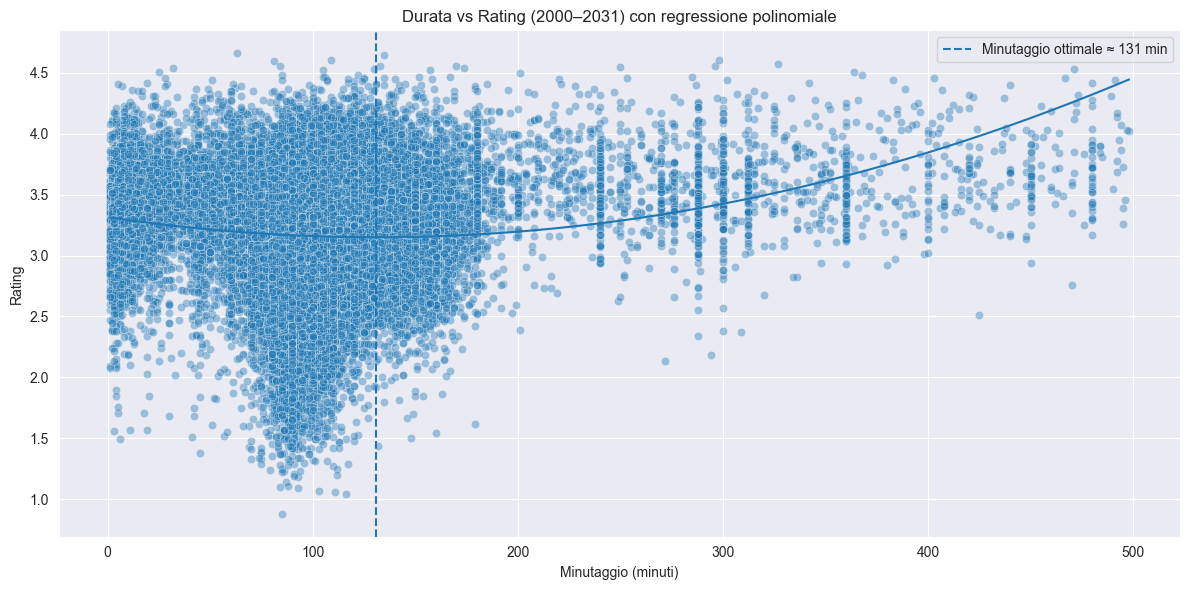

In [17]:
# prendiamo in esame il range che va dal 2000 al 2031 e proviamo a calcolare quale dovrebbe essere il minutaggio corretto per aumentare le probabilità di avere un rating maggiore.
# etichette che contengono gli anni dal 2000 al 2031
target_labels = ["2000-2010", "2010-2020", "2020-2031"]
# filtro su year_range
movies_2000_2031 = (movies_w_genres_t_range_df[movies_w_genres_t_range_df["year_range"].isin(target_labels)]
                    .dropna(subset = ["minute", "rating"])).query("minute < 500")


# il codice è stato generato grazie al supporto dell'AI ----------------------------

# 2) Estrai le variabili
X = movies_2000_2031["minute"].values
Y = movies_2000_2031["rating"].values

# 3) Fit polinomiale di grado 2: y ≈ a·x² + b·x + c
a, b, c = np.polyfit(X, Y, deg=2)

# 4) Calcola il vertice della parabola (minuto ottimale)
optimal_minute = -b / (2 * a)

# 5) Crea il plot
x_range = np.linspace(X.min(), X.max(), 500)
y_pred  = np.polyval([a, b, c], x_range)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=X, y=Y, alpha=0.4)
plt.plot(x_range, y_pred)
plt.axvline(optimal_minute, linestyle="--",
            label=f"Minutaggio ottimale ≈ {optimal_minute:.0f} min")
plt.title("Durata vs Rating (2000–2031) con regressione polinomiale")
plt.xlabel("Minutaggio (minuti)")
plt.ylabel("Rating")
plt.legend()
plt.tight_layout()
plt.show()

### Analisi su un dataset composto per analizzare le correlazioni dei film per paese di produzione

In [18]:
movies_w_country_df = pd.merge(movies_df_norm, grouped_countries_df, on = "id")

# creaimo una copia del dataset
movies_w_country_exp_df = movies_w_country_df.explode("country").copy().reset_index(drop = True)

# ci concentriamo sui paesi che hanno prodotto più di 10000 film in quanto rappresentare tutte le nazioni che hanno prodotto un film altera le rappresentazioni grafiche
country_group_df = movies_w_country_exp_df.groupby("country")["id"].count().reset_index()
country_group_df = country_group_df[country_group_df["id"] > 10000]["country"]

In [19]:

country_group_df.unique()


array(['Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Italy',
       'Japan', 'Mexico', 'Russian Federation', 'South Korea', 'Spain',
       'UK', 'USA'], dtype=object)

In [20]:

movies_w_best_country_df = movies_w_country_exp_df.merge(country_group_df, on = "country")
movies_w_best_country_df["country"].unique()

array(['UK', 'USA', 'South Korea', 'Germany', 'Canada', 'Japan', 'China',
       'France', 'Brazil', 'Italy', 'India', 'Spain', 'Mexico',
       'Russian Federation'], dtype=object)

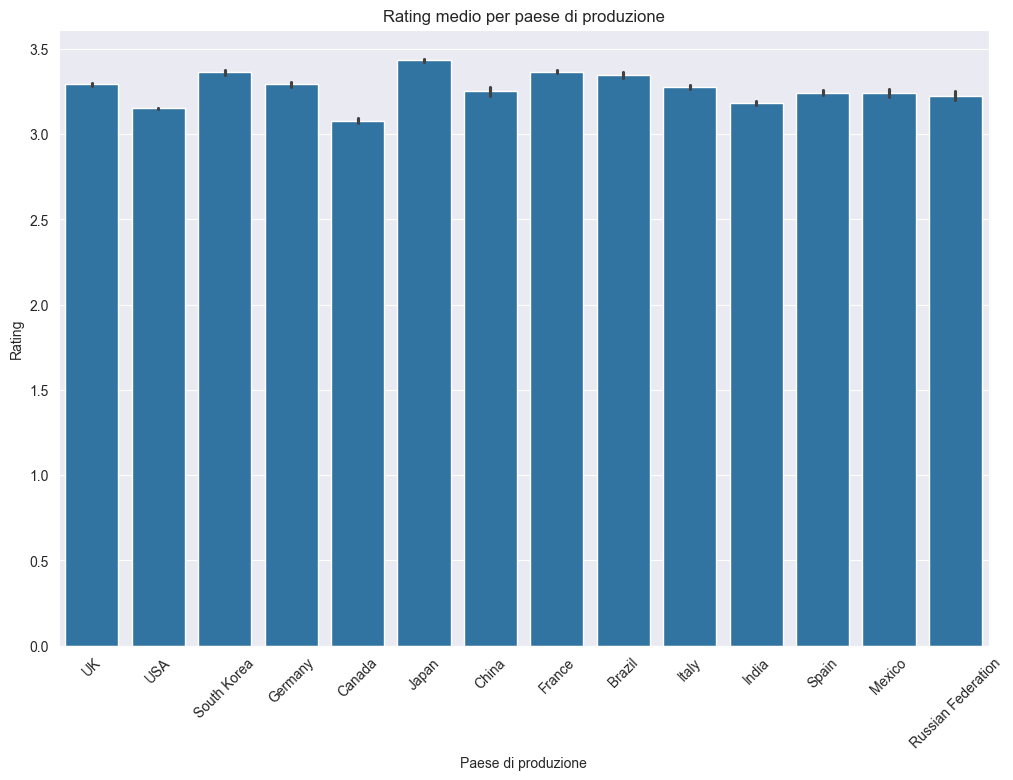

In [21]:
# calcoliamo qual è il rating medio per ogni paese di produzione
plt.figure(figsize = (12, 8))
ax = sns.barplot(data = movies_w_best_country_df, x = "country", y = "rating")

plt.title("Rating medio per paese di produzione")
plt.xlabel("Paese di produzione")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show()

##### analizziamo i generi prodotti dalle varie nazioni

In [22]:
# creaiamo un ulteriore dataset che contiene i generi, i paesi di produzione e il range di anno di produzione
movies_w_genres_and_country_df = pd.merge(movies_w_best_country_df, exploded_genre_yr, on = ["id", "name", "date", "description", "minute", "rating"])

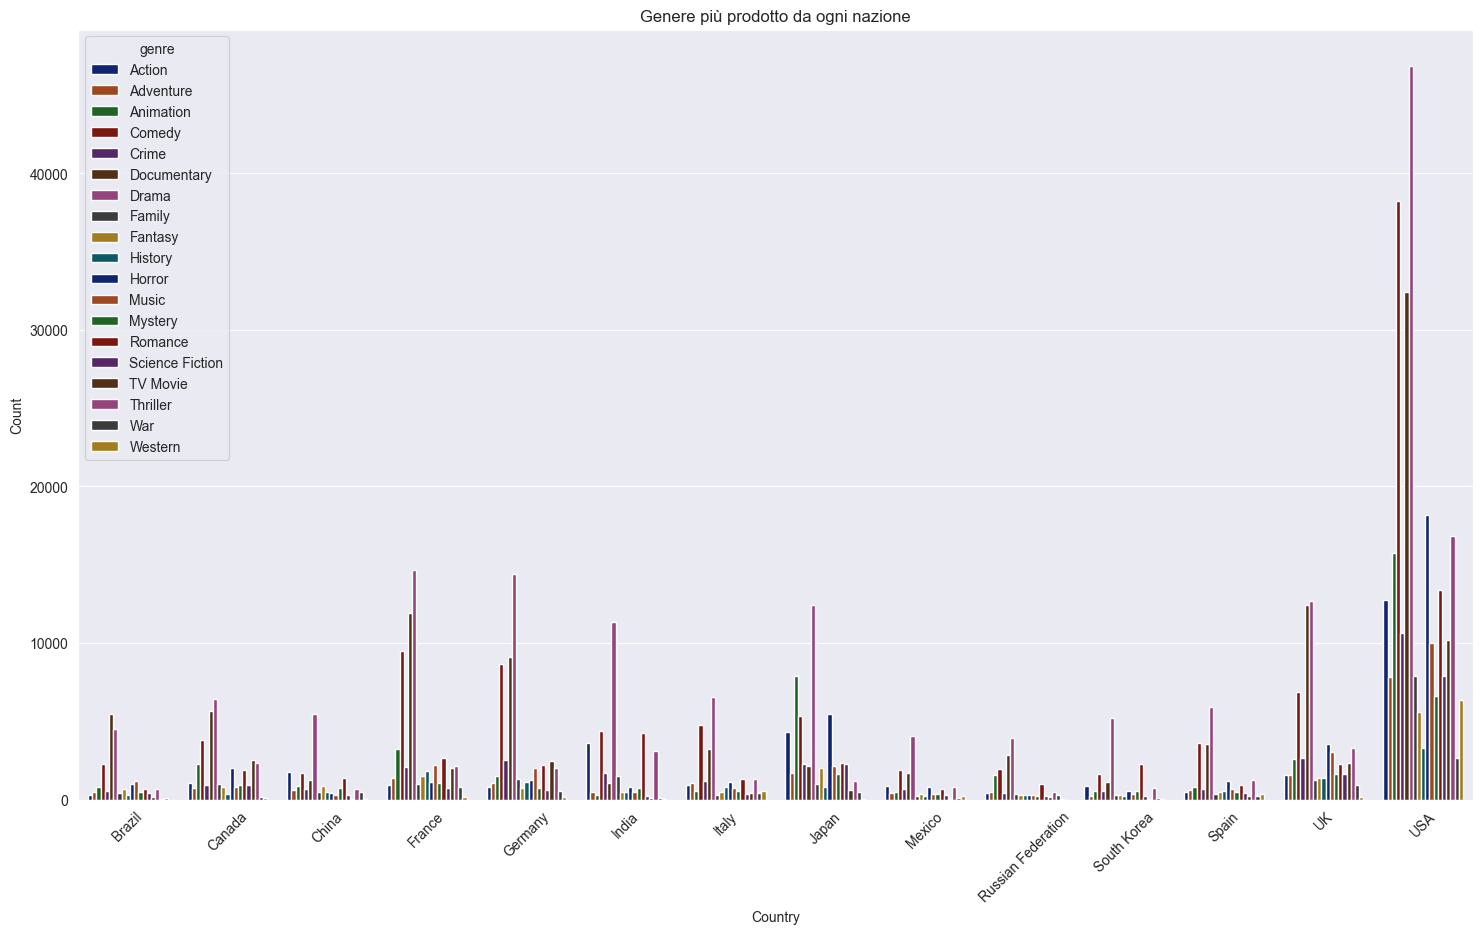

In [23]:
# quali generi sono stati prodotti maggiormente dalle varie nazioni
df = movies_w_genres_and_country_df.groupby(["country", "genre"]).size().reset_index(name = "n_film")
plt.figure(figsize = (18, 10))

ax = sns.barplot(data = df, x = "country", y = "n_film", hue = "genre", palette = "dark")
plt.title("Genere più prodotto da ogni nazione")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

##### calcoliamo anche la media dei generi per ogni paese di produzione

In [24]:
# da utilizzare in ausilio per il grafico precedente per una valutazione più accurata
movie_rating_per_country = movies_w_genres_and_country_df.groupby(["country", "genre"])["rating"].mean()
movie_rating_per_country

country  genre          
Brazil   Action             3.088491
         Adventure          3.103263
         Animation          3.290110
         Comedy             3.141832
         Crime              3.376000
                              ...   
USA      Science Fiction    2.899351
         TV Movie           3.035299
         Thriller           2.924657
         War                3.308542
         Western            3.270096
Name: rating, Length: 266, dtype: float64

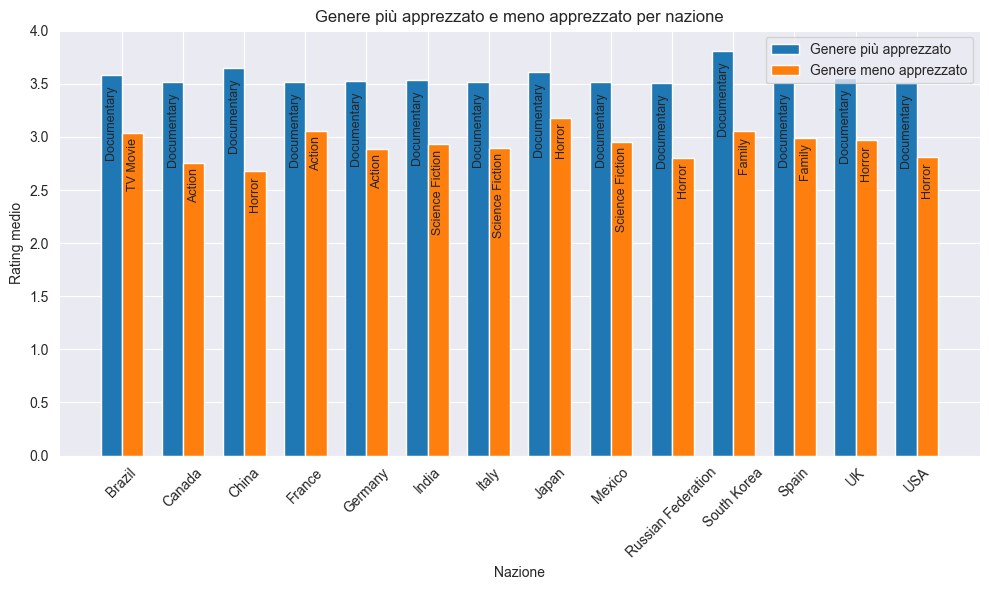

In [25]:
# adesso calcoliamo il genere più apprezzato e più detestato per ogni nazione
rating = movie_rating_per_country.reset_index()
idx_best = rating.groupby("country")["rating"].idxmax()
idx_worst = rating.groupby("country")["rating"].idxmin()

best  = rating.loc[idx_best].assign(type="Best")
worst = rating.loc[idx_worst].assign(type="Worst")

# BLOCCO DI CODICE GENERATO CON L'AUSILIO DELL'AI -----------------------------
# 3. Prepara i dati per il plot
countries    = best['country'].values
n_countries  = len(countries)
positions    = np.arange(n_countries)
width        = 0.35

best_vals    = best.set_index('country').loc[countries]['rating']
worst_vals   = worst.set_index('country').loc[countries]['rating']
best_genres  = best.set_index('country').loc[countries]['genre']
worst_genres = worst.set_index('country').loc[countries]['genre']

# 4. Disegna le barre
plt.figure(figsize=(10,6))
bars_best  = plt.bar(positions - width/2, best_vals,  width, label='Genere più apprezzato')
bars_worst = plt.bar(positions + width/2, worst_vals, width, label='Genere meno apprezzato')

# 5. Annotazioni verticali
for bar, genre in zip(bars_best, best_genres):
    plt.text(
        bar.get_x() + bar.get_width()/2,          # x center
        bar.get_height() - 0.8,                  # y just above
        genre,                                    # text
        ha='center',                              # align center horizontally
        va='bottom',                              # align text baseline
        rotation=90,                              # rotate vertical
        fontsize=9
    )

for bar, genre in zip(bars_worst, worst_genres):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() - 0.05,
        genre,
        ha='center',
        va='top',
        rotation=90,
        fontsize=9
    )
# -------------------------------

plt.xticks(positions, countries, rotation=45)
plt.ylabel('Rating medio')
plt.xlabel('Nazione')
plt.title('Genere più apprezzato e meno apprezzato per nazione')
plt.legend()
plt.tight_layout()
plt.show()

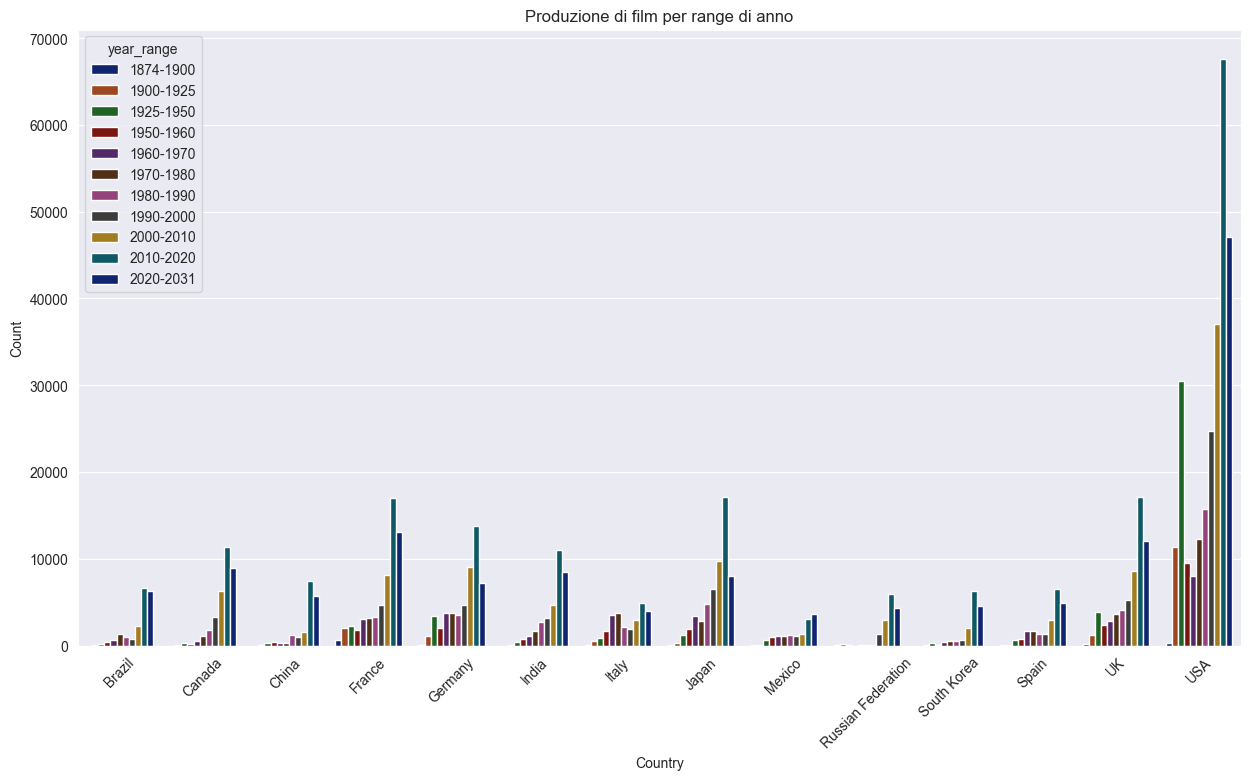

In [26]:
# in che range di anni ogni paese ha prodotto più film
df = movies_w_genres_and_country_df.groupby(["country", "year_range"], observed = True)["id"].size().reset_index(name = "n_films")
plt.figure(figsize = (15, 8))

ax = sns.barplot(data = df, x = "country", y = "n_films", hue = "year_range", palette = "dark")
plt.title("Produzione di film per range di anno")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

In [27]:
movies_w_genres_and_country_df

,id,name,date,description,minute,rating,country,genre,year_range
0,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,UK,Comedy,2020-2031
1,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,UK,Adventure,2020-2031
2,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,USA,Comedy,2020-2031
3,1000001,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,USA,Adventure,2020-2031
4,1000002,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,South Korea,Comedy,2010-2020
...,...,...,...,...,...,...,...,...,...
710909,1941563,数到三,NaN,NaN,NaN,NaN,China,Drama,NaN
710910,1941566,日本統一35,NaN,The leaders of the Kyowakai are surprised that...,80.0,NaN,USA,Crime,NaN
710911,1941569,日本統一38,NaN,"Obuchi, the young leader of Gasonkai, a group ...",70.0,NaN,USA,Crime,NaN
710912,1941596,重生,NaN,"In a world where order has broken down, darkne...",NaN,NaN,China,Action,NaN


### Utilizzo del dataset Crew

In [28]:
crew_csv = pd.read_csv("Main_data/crew.csv")

# utilizziamo solo i produttori e i direttori per evitare di includere figure di second'ordine
crew_df = crew_csv[crew_csv["role"].isin(["Director", "Producer"])].reset_index(drop = True)
crew_df.rename(columns = {"name" : "name_role"}, inplace = True)
crew_df

,id,role,name_role
0,1000001,Director,Greta Gerwig
1,1000001,Producer,Tom Ackerley
2,1000001,Producer,Margot Robbie
3,1000001,Producer,Robbie Brenner
4,1000001,Producer,David Heyman
...,...,...,...
1467212,1941560,Producer,Wong Kar-wai
1467213,1941563,Director,Lin Sun
1467214,1941589,Director,田磊
1467215,1941596,Director,Marc Ma


#### uniamo il dataframe precedente con il nuovo dataframe dei ruoli

In [29]:
movies_w_crew = pd.merge(crew_df, movies_w_genres_and_country_df, on = "id")
movies_w_crew.rename(columns = {"name" : "film_title"}, inplace = True)
movies_w_crew

,id,role,name_role,film_title,date,description,minute,rating,country,genre,year_range
0,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,UK,Comedy,2020-2031
1,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,UK,Adventure,2020-2031
2,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,USA,Comedy,2020-2031
3,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,USA,Adventure,2020-2031
4,1000001,Producer,Tom Ackerley,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,UK,Comedy,2020-2031
...,...,...,...,...,...,...,...,...,...,...,...
1674649,1941563,Director,Lin Sun,数到三,NaN,NaN,NaN,NaN,China,Drama,NaN
1674650,1941596,Director,Marc Ma,重生,NaN,"In a world where order has broken down, darkne...",NaN,NaN,China,Action,NaN
1674651,1941596,Director,Marc Ma,重生,NaN,"In a world where order has broken down, darkne...",NaN,NaN,China,Crime,NaN
1674652,1941596,Producer,朱子亮,重生,NaN,"In a world where order has broken down, darkne...",NaN,NaN,China,Action,NaN


##### analizziamo chi sono stati i direttori che hanno diretto più film

In [30]:
# chi ha diretto più film
directors = movies_w_crew[(movies_w_crew["role"] == "Director")].groupby("name_role")["film_title"].nunique().reset_index(name = "n_films").sort_values("n_films", ascending = False).reset_index(drop = True)

top_director = directors.loc[0]
print(f"Il direttore che ha diretto più film è {top_director.name_role} con {top_director.n_films}")

directors


Il direttore che ha diretto più film è Dave Fleischer con 528


,name_role,n_films
0,Dave Fleischer,528
1,Gilbert M. Anderson,365
2,Seymour Kneitel,339
3,Friz Freleng,298
4,Chuck Jones,284
...,...,...
163295,A&E,1
163296,Findlay Bunting,1
163297,A-lan Holt,1
163298,"""William"" Zubricki-Vetrano",1


##### analizziamo chi è il miglior e il peggior direttore

In [31]:
directors = movies_w_crew[(movies_w_crew["role"] == "Director")]
avg_ratings = directors.groupby("name_role")["rating"].mean().sort_values(ascending = False).reset_index(name = "avg_rating")

idx_best  = avg_ratings["avg_rating"].idxmax()
idx_worst = avg_ratings["avg_rating"].idxmin()

best  = avg_ratings.loc[idx_best]
worst = avg_ratings.loc[idx_worst]

print(f"Regista con la media di rating migliore: {best['name_role']} — {best['avg_rating']:.2f}")
print(f"Regista con la media di rating peggiore: {worst['name_role']} — {worst['avg_rating']:.2f}")

# che film ha diretto il miglior direttore
directors[directors["name_role"] == "Stuart Richardson"]

# date le analisi precedenti la probabilità che avesse diretto un documentario erano più alte in quanto i documentari sono la categoria più apprezzata

# di contro andiamo a controllare la categoria di film più disprezzata (horror) quindi ci aspettiamo che Ann abbia diretto dei film horror
directors[directors["name_role"] == "Ann Deborah Fishman"]
# l'analisi non ha rispecchiato le previsione ma comunque non ha diretto nessun film con il genere più apprezzato

Regista con la media di rating migliore: Stuart Richardson — 4.65
Regista con la media di rating peggiore: Ann Deborah Fishman — 1.09


,id,role,name_role,film_title,date,description,minute,rating,country,genre,year_range
163359,1009106,Director,Ann Deborah Fishman,Swiped,2018.0,"James, a college freshman and computer genius,...",93.0,1.09,USA,Romance,2010-2020
163360,1009106,Director,Ann Deborah Fishman,Swiped,2018.0,"James, a college freshman and computer genius,...",93.0,1.09,USA,Comedy,2010-2020
163361,1009106,Director,Ann Deborah Fishman,Swiped,2018.0,"James, a college freshman and computer genius,...",93.0,1.09,USA,Drama,2010-2020
966485,1180167,Director,Ann Deborah Fishman,Marriage Material,2014.0,Iris Carsen wants her daughter to find a man w...,103.0,NaN,USA,Family,2010-2020
966486,1180167,Director,Ann Deborah Fishman,Marriage Material,2014.0,Iris Carsen wants her daughter to find a man w...,103.0,NaN,USA,Comedy,2010-2020
966487,1180167,Director,Ann Deborah Fishman,Marriage Material,2014.0,Iris Carsen wants her daughter to find a man w...,103.0,NaN,USA,Romance,2010-2020
1611507,1783864,Director,Ann Deborah Fishman,Christmas Overtime,NaN,An unemployed actress is offered a commercial ...,92.0,NaN,USA,Comedy,NaN
1611508,1783864,Director,Ann Deborah Fishman,Christmas Overtime,NaN,An unemployed actress is offered a commercial ...,92.0,NaN,USA,Romance,NaN


##### analizziamo chi ha diretto più film per ogni genere

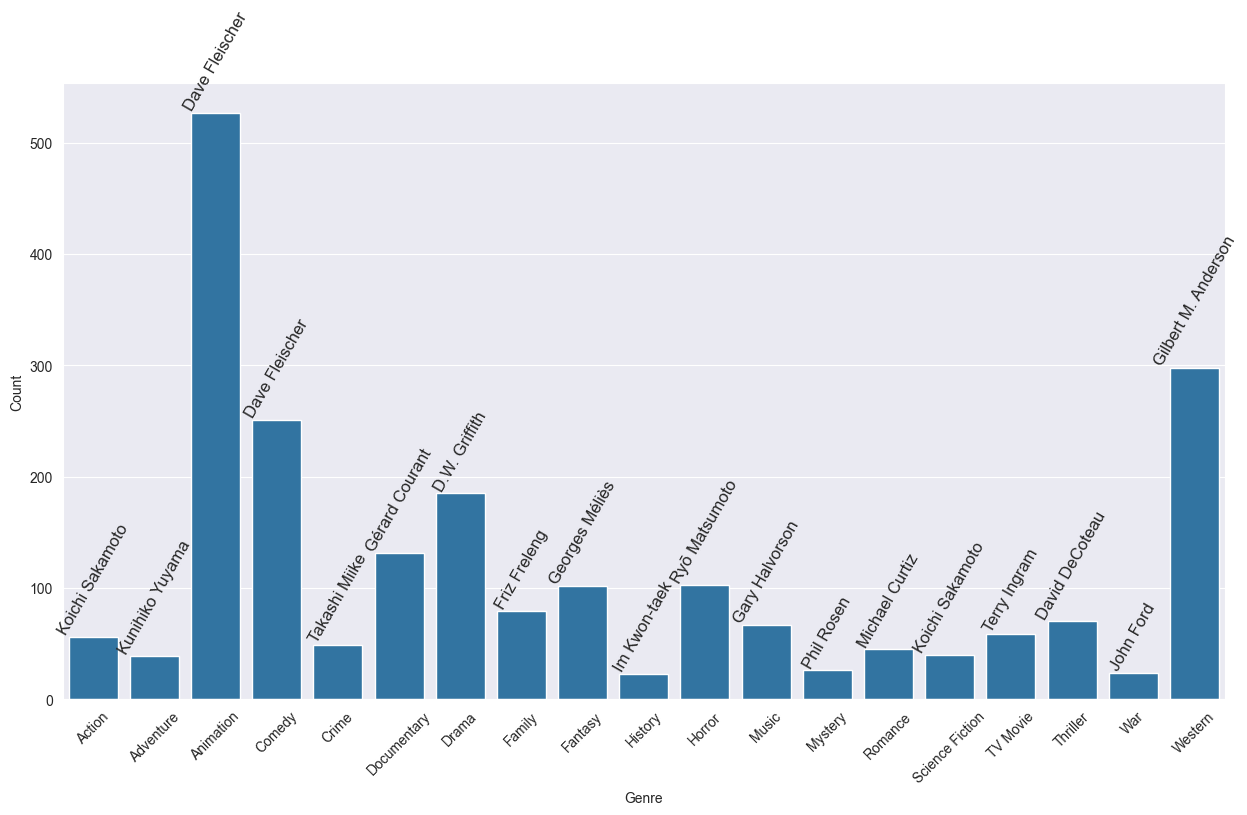

              genre            name_role  n_films
0            Action      Koichi Sakamoto       56
1         Adventure      Kunihiko Yuyama       39
2         Animation       Dave Fleischer      527
3            Comedy       Dave Fleischer      251
4             Crime        Takashi Miike       49
5       Documentary       Gérard Courant      131
6             Drama        D.W. Griffith      185
7            Family         Friz Freleng       79
8           Fantasy       Georges Méliès      102
9           History         Im Kwon-taek       23
10           Horror        Ryō Matsumoto      103
11            Music       Gary Halvorson       67
12          Mystery           Phil Rosen       26
13          Romance       Michael Curtiz       45
14  Science Fiction      Koichi Sakamoto       40
15         TV Movie         Terry Ingram       59
16         Thriller       David DeCoteau       70
17              War            John Ford       24
18          Western  Gilbert M. Anderson      298


In [32]:
gen_dir_count = directors.groupby(["genre", "name_role"])["film_title"].nunique().reset_index(name = "n_films")
idx_max = gen_dir_count.groupby("genre")["n_films"].idxmax()

top_directors_per_genre = (gen_dir_count.loc[idx_max].reset_index(drop=True).sort_values("genre"))

plt.figure(figsize = (15, 8))
ax = sns.barplot(data = top_directors_per_genre, x = "genre", y = "n_films")

# 3) Annotazioni: nome del regista sopra ogni barra
for patch, director in zip(ax.patches, top_directors_per_genre["name_role"]):
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height,
        director,
        ha="center",
        va="bottom",
        rotation=60,
        fontsize=12
    )

plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

print(top_directors_per_genre)

### Utilizzo del dataset Themes

In [33]:
themes_df = pd.read_csv("Main_data/themes.csv")
themes_df

,id,theme
0,1000001,Humanity and the world around us
1,1000001,Crude humor and satire
2,1000001,Moving relationship stories
3,1000001,Emotional and captivating fantasy storytelling
4,1000001,Surreal and thought-provoking visions of life ...
...,...,...
125636,1835643,Noir and dark crime dramas
125637,1835643,Intriguing and suspenseful murder mysteries
125638,1849827,Faith and religion
125639,1849827,Faith and spiritual journeys


#### uniamo il dataset precedente di film con il nuovo dataset dei temi trattati dai film

In [34]:
# non utilizziamo il dataset con tutti i menbri della crew ma ci concentriamo sui direttori del film
movies_w_themes = pd.merge(directors, themes_df, on = "id")
movies_w_themes

,id,role,name_role,film_title,date,description,minute,rating,country,genre,year_range,theme
0,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,UK,Comedy,2020-2031,Humanity and the world around us
1,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,UK,Comedy,2020-2031,Crude humor and satire
2,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,UK,Comedy,2020-2031,Moving relationship stories
3,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,UK,Comedy,2020-2031,Emotional and captivating fantasy storytelling
4,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,UK,Comedy,2020-2031,Surreal and thought-provoking visions of life ...
...,...,...,...,...,...,...,...,...,...,...,...,...
432821,1835643,Director,Craig Viveiros,Angela Black,2021.0,Angela Black leads a seemingly idyllic life wi...,270.0,NaN,UK,Drama,2020-2031,"Crime, drugs and gangsters"
432822,1835643,Director,Craig Viveiros,Angela Black,2021.0,Angela Black leads a seemingly idyllic life wi...,270.0,NaN,UK,Drama,2020-2031,Suspenseful crime thrillers
432823,1835643,Director,Craig Viveiros,Angela Black,2021.0,Angela Black leads a seemingly idyllic life wi...,270.0,NaN,UK,Drama,2020-2031,Twisted dark psychological thriller
432824,1835643,Director,Craig Viveiros,Angela Black,2021.0,Angela Black leads a seemingly idyllic life wi...,270.0,NaN,UK,Drama,2020-2031,Noir and dark crime dramas


##### qual è il tema più apprezzato

In [35]:
# come prima cosa vediamo quali sono i temi più utilizzati per i film
movies_w_themes.groupby("theme").size().reset_index(name = "n_films").sort_values("n_films", ascending = False)


,theme,n_films
18,Crude humor and satire,12254
70,Moving relationship stories,12057
55,"Horror, the undead and monster classics",11728
100,Twisted dark psychological thriller,11564
45,"Gory, gruesome, and slasher horror",9685
...,...,...
4,Air pilot heroism and survival,802
59,Inspiring sports underdog stories,720
101,Underdog fighting and boxing stories,422
93,Teen friendship and coming-of-age,249


In [36]:

themes_avg_rating = movies_w_themes.groupby("theme")["rating"].mean().sort_values(ascending = False).reset_index(name = "avg_rating")
# possiamo notare come i temi più graditi rispecchiano la categoria del genere infatti tra le prime posizioni troviamo dei temi drammatici e invece alle ultime posizioni troviamo temi horror
id_best_theme = themes_avg_rating["avg_rating"].idxmax()

best_theme = themes_avg_rating.loc[id_best_theme]
print(f"il tema più apprezzato è {best_theme.theme} con una media di {best_theme.avg_rating:.3f}")
themes_avg_rating

il tema più apprezzato è Humanity and the world around us con una media di 3.655


,theme,avg_rating
0,Humanity and the world around us,3.655326
1,Emotional and captivating fantasy storytelling,3.654733
2,Surreal and thought-provoking visions of life ...,3.621975
3,Tragic sadness and captivating beauty,3.618405
4,Powerful poetic and passionate drama,3.581770
...,...,...
104,Extreme gory horror and cannibalism,2.790802
105,Bloody vampire horror,2.758870
106,Sci-fi monster and dinosaur adventures,2.745285
107,Survival horror and zombie carnage,2.720505


##### il tema più apprezzato a che categoria di genere viene utilizzato maggiormente

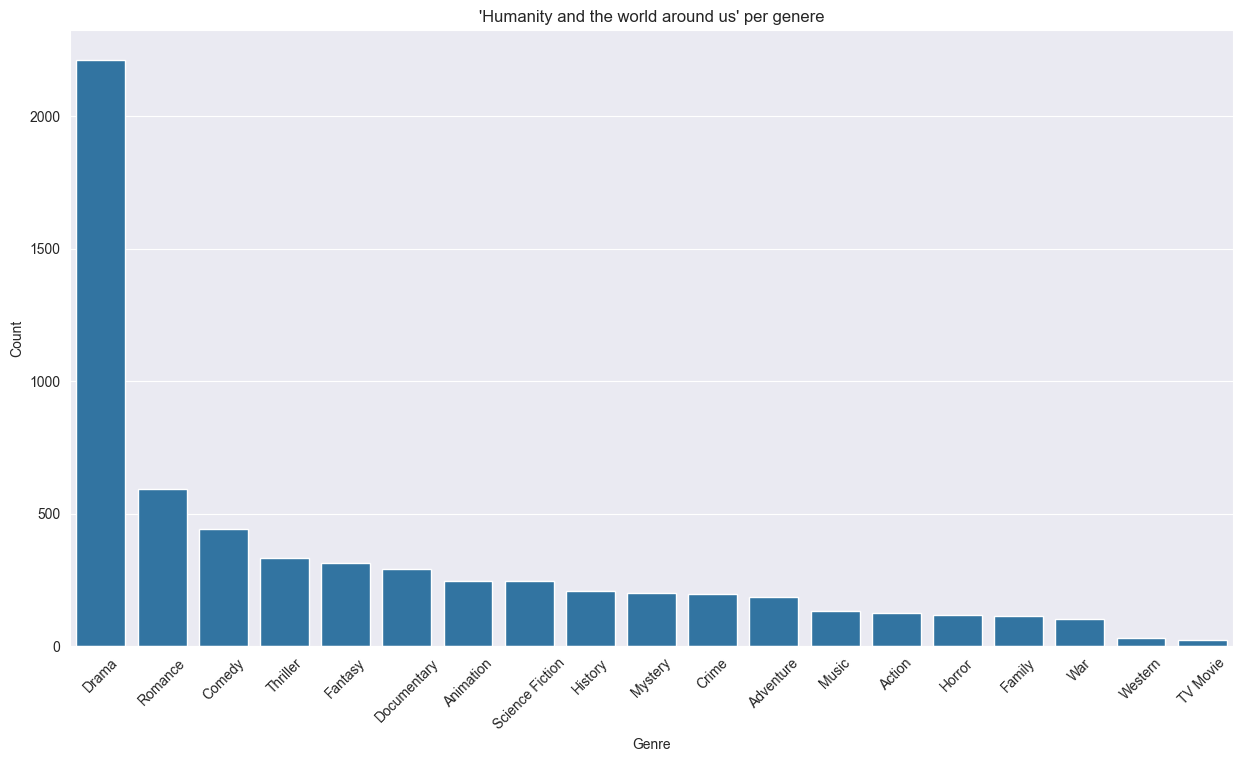

In [37]:
data_theme = movies_w_themes[movies_w_themes["theme"] == best_theme.theme].groupby("genre").size().reset_index(name = "n_films").sort_values("n_films", ascending = False)
plt.figure(figsize = (15, 8))
ax = sns.barplot(data = data_theme, x = "genre", y = "n_films")
plt.title(f"'{best_theme.theme}' per genere")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

##### qual è il tema che dura di più

In [38]:
movies_w_themes.groupby("theme")["minute"].mean().reset_index(name = "avg_minutage").sort_values("avg_minutage", ascending = False)

# possiamo notare come il tema che ha una durata maggiore è anche uno dei più apprezzati come anche altri presenti in questa lista sono tra i più apprezzati

,theme,avg_minutage
25,Emotional and captivating fantasy storytelling,209.802723
99,Tragic sadness and captivating beauty,191.380128
66,Lavish dramas and sumptuous royalty,164.113394
33,Epic history and literature,162.992975
41,"Fantasy adventure, heroism, and swordplay",160.542385
...,...,...
38,Fairy-tale fantasy and enchanted magic,95.807229
37,Extreme gory horror and cannibalism,95.290837
15,Chilling experiments and classic monster horror,94.199191
2,Adorable animals and heartwarming families,93.893673


##### qual è il tema più utilizzato nei vari range di anno

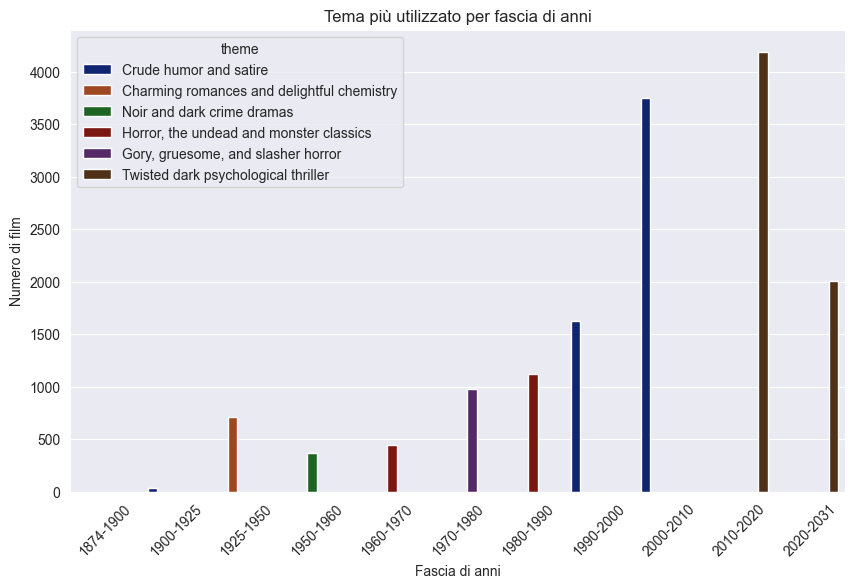

In [39]:

agg_count = (movies_w_themes.groupby(["year_range", "theme"], observed = True).size().reset_index(name="count"))

top_count = agg_count.loc[agg_count.groupby('year_range', observed = True)['count'].idxmax()]

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_count,x="year_range", y="count", hue = "theme", order=labels, palette = "dark")
plt.xticks(rotation=45)
plt.title("Tema più utilizzato per fascia di anni")
plt.xlabel("Fascia di anni")
plt.ylabel("Numero di film")
plt.show()

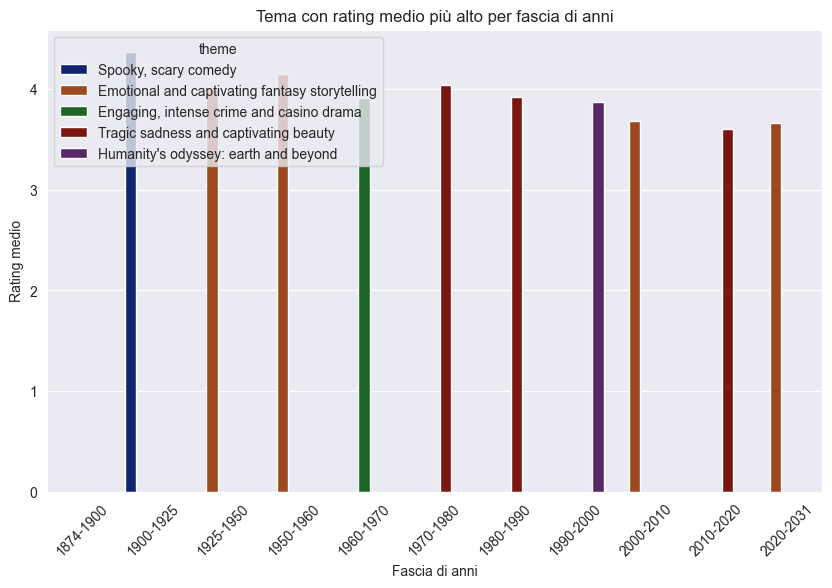

In [40]:
agg_rating = (movies_w_themes.groupby(["year_range", "theme"], observed= True)["rating"].mean().reset_index(name="avg_rating"))

idx = agg_rating.groupby("year_range", observed=True)["avg_rating"].idxmax()
idx = idx.dropna().astype(int)

top_rating = agg_rating.loc[idx].sort_values("year_range")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_rating,x="year_range", y="avg_rating", hue = "theme", palette = "dark")
plt.xticks(rotation=45)
plt.title("Tema con rating medio più alto per fascia di anni")
plt.xlabel("Fascia di anni")
plt.ylabel("Rating medio")
plt.show()

##### dato un determinato tema come varia il rating in base al minutaggio (scatterplot o violinplot)

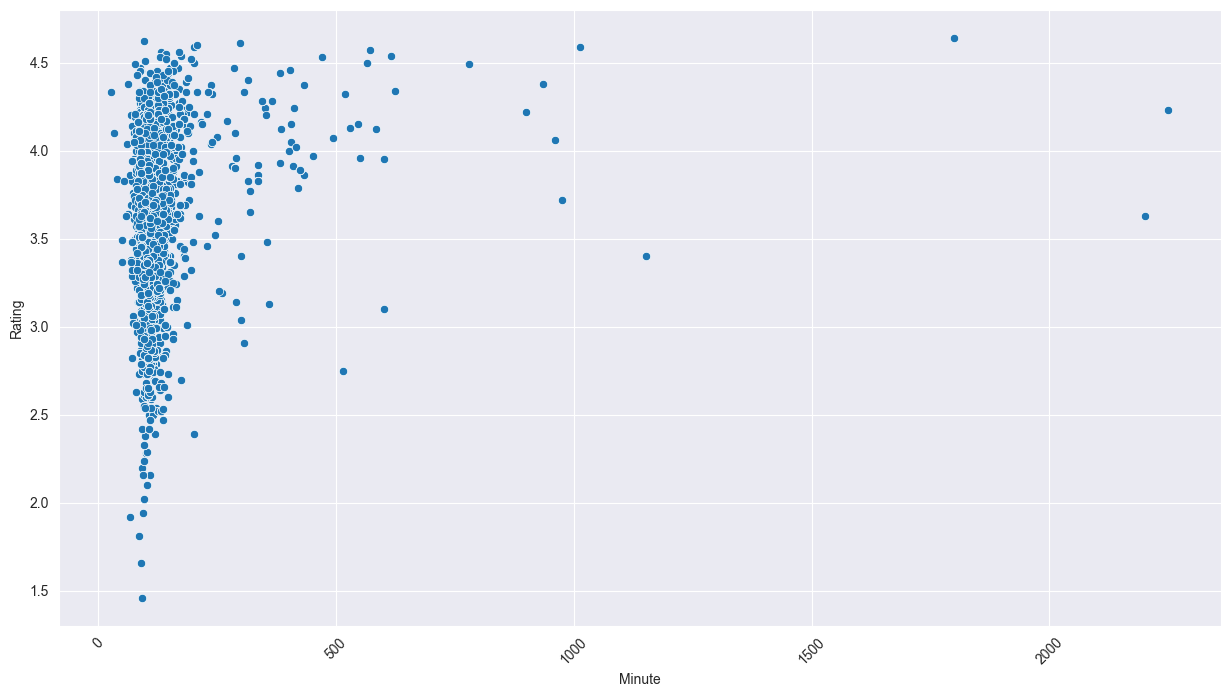

In [41]:
best_theme_rating = movies_w_themes[movies_w_themes["theme"] == best_theme.theme]
plt.figure(figsize = (15, 8))
ax = sns.scatterplot(data = best_theme_rating, x = "minute", y = "rating")
plt.xlabel("Minute")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show()

C:\Users\Domenico\AppData\Local\Temp\ipykernel_10844\761640329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_theme_rating['minute_bin'] = pd.cut(best_theme_rating['minute'], bins=bins, labels=labels, right=False)


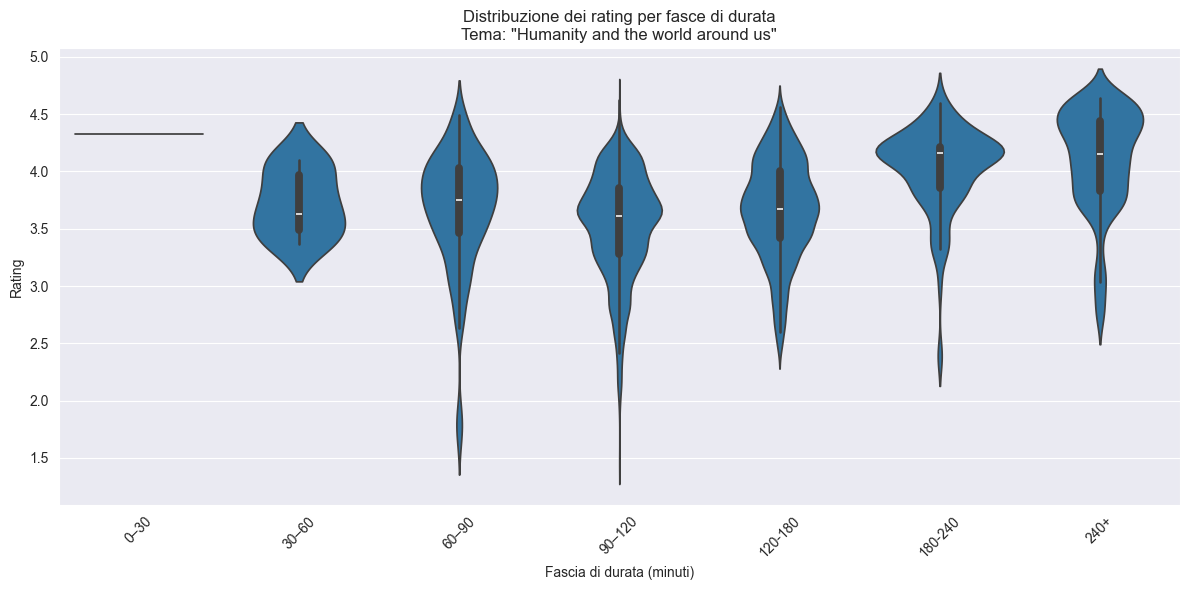

In [42]:
# proviamo a indicare ora la distribuzione dei vari rating per minutaggio con un violin plot
bins = [0, 30, 60, 90, 120, 180, 240, float('inf')]
labels = ['0–30', '30–60', '60–90', '90–120', '120-180', '180-240', '240+']

best_theme_rating['minute_bin'] = pd.cut(best_theme_rating['minute'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12,6))
ax = sns.violinplot(data=best_theme_rating,x='minute_bin',y='rating')          # non estende la curva oltre i dati)
plt.xticks(rotation=45)
plt.title(f'Distribuzione dei rating per fasce di durata\nTema: "{best_theme.theme}"')
plt.xlabel('Fascia di durata (minuti)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

##### nei periodi scanditi dalla guerra i film con il tema più utilizzati presentano la parola war o qualcosa di simile?

In [43]:
war_bins = [1914, 1918, 1925, 1930, 1935, 1940, 1945, 1950]
war_label = ["1914-1918", "1918-1925", "1925-1930", "1930-1935", "1935-1940", "1940-1945", "1945-1950"]

movies_w_themes_in_war = movies_w_themes[(movies_w_themes["date"] >= 1914) & (movies_w_themes["date"] <= 1950)]
movies_wartime_films = movies_w_themes_in_war.groupby(["theme"]).size().reset_index(name = "n_films").sort_values("n_films", ascending = False).reset_index(drop = True)
# selezioniamo i primi 30 temi per numero di film
top_30_wartime = movies_wartime_films.head(30)

In [44]:
# BLOCCO DI CODICE GENERATO CON L'AUSILIO DELL'AI -----------------------------
import re

# Supponendo che `top30` sia il DataFrame con i tuoi primi 30 temi:

keywords = ["war", "military", "battle", "conflict"]    # aggiungere altre keywords inerenti alla guerra
# costruisce una regex tipo r"\b(?:war|military|battle|conflict)\b"
pattern = r"\b(?:" + "|".join(keywords) + r")\b"

# mask True su tutte le righe il cui tema contiene almeno una di quelle parole, case‐insensitive
mask = top_30_wartime['theme'].str.contains(pattern, flags=re.IGNORECASE, na=False, regex=True)

# estrai solo i temi corrispondenti
matched = top_30_wartime.loc[mask, 'theme']
print("Temi che contengono una delle parole chiave:", matched.tolist())

Temi che contengono una delle parole chiave: ['War and historical adventure', 'Military combat and heroic soldiers', 'Nazis and World War II', 'Bravery in War']


##### i temi che rispecchiano la guerra in questo periodo hanno riscosso un rating alto?

In [45]:
movies_wartime_rating = movies_w_themes_in_war.groupby("theme")["rating"].mean().reset_index(name = "avg_rating").sort_values("avg_rating", ascending = False).reset_index(drop = True)
mask_rating_war = movies_wartime_rating['theme'].str.contains(pattern, flags=re.IGNORECASE, na=False, regex=True)
movies_wartime_rating.loc[mask_rating_war, ['theme', "avg_rating"]]

# possiamo notare come in questo periodo la media dei film a tema bellico sia superiore a quella totale (3.38) probabilmente dovuta all'empatia e al coinvolgimento del pubblico per un temo allora attuale

,theme,avg_rating
50,War and historical adventure,3.471578
53,Nazis and World War II,3.464985
54,Military combat and heroic soldiers,3.462058
55,"Political drama, patriotism, and war",3.454085
58,Bravery in War,3.440038


## Utilizzo del dataset Language

In [46]:
languages_df = pd.read_csv("Main_data/languages.csv")
movies_w_languages = pd.merge(directors, languages_df, on = "id")
movies_w_languages

,id,role,name_role,film_title,date,description,minute,rating,country,genre,year_range,type,language
0,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,UK,Comedy,2020-2031,Language,English
1,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,UK,Adventure,2020-2031,Language,English
2,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,USA,Comedy,2020-2031,Language,English
3,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,USA,Adventure,2020-2031,Language,English
4,1000002,Director,Bong Joon-ho,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,South Korea,Comedy,2010-2020,Primary language,Korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012529,1941541,Director,Zhang Yimou,Zhang Yimou's Three-Body Problem Movie,NaN,Based on the novel.,NaN,NaN,China,Science Fiction,NaN,Language,English
1012530,1941541,Director,Zhang Yimou,Zhang Yimou's Three-Body Problem Movie,NaN,Based on the novel.,NaN,NaN,USA,Science Fiction,NaN,Language,English
1012531,1941563,Director,Lin Sun,数到三,NaN,NaN,NaN,NaN,China,Drama,NaN,Language,Chinese
1012532,1941596,Director,Marc Ma,重生,NaN,"In a world where order has broken down, darkne...",NaN,NaN,China,Action,NaN,Language,Chinese


##### quante occorrenze per ciascuna lingua

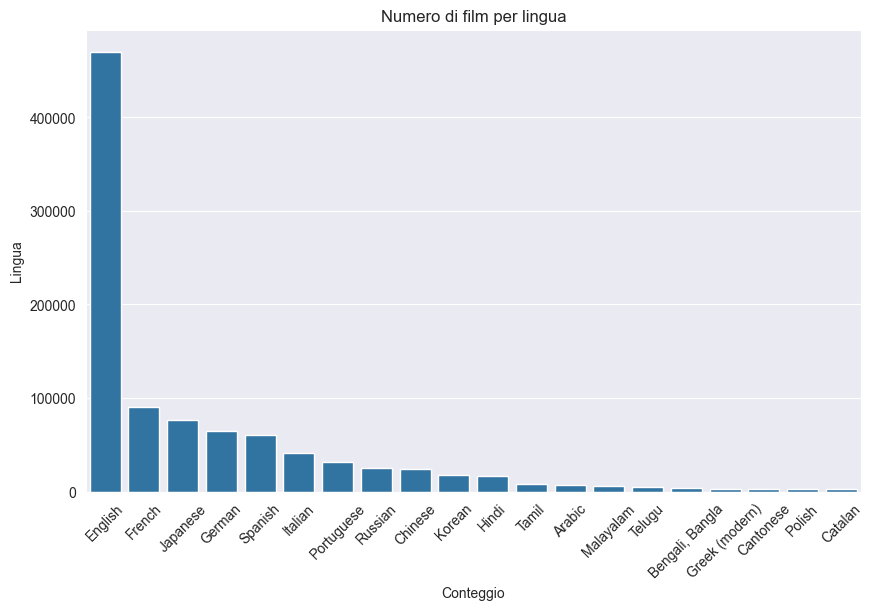

In [47]:
top_20_languages = movies_w_languages["language"].value_counts().nlargest(20)

plt.figure(figsize=(10,6))
ax = sns.barplot(data = top_20_languages)
plt.title("Numero di film per lingua")
plt.xlabel("Conteggio")
plt.xticks(rotation = 45)
plt.ylabel("Lingua")
plt.show()


In [48]:
movies_w_top_20_languages = movies_w_languages[movies_w_languages["language"].isin(top_20_languages.index.tolist())]
movies_w_top_20_languages

,id,role,name_role,film_title,date,description,minute,rating,country,genre,year_range,type,language
0,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,UK,Comedy,2020-2031,Language,English
1,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,UK,Adventure,2020-2031,Language,English
2,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,USA,Comedy,2020-2031,Language,English
3,1000001,Director,Greta Gerwig,Barbie,2023.0,Barbie and Ken are having the time of their li...,114.0,3.86,USA,Adventure,2020-2031,Language,English
4,1000002,Director,Bong Joon-ho,Parasite,2019.0,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,South Korea,Comedy,2010-2020,Primary language,Korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012529,1941541,Director,Zhang Yimou,Zhang Yimou's Three-Body Problem Movie,NaN,Based on the novel.,NaN,NaN,China,Science Fiction,NaN,Language,English
1012530,1941541,Director,Zhang Yimou,Zhang Yimou's Three-Body Problem Movie,NaN,Based on the novel.,NaN,NaN,USA,Science Fiction,NaN,Language,English
1012531,1941563,Director,Lin Sun,数到三,NaN,NaN,NaN,NaN,China,Drama,NaN,Language,Chinese
1012532,1941596,Director,Marc Ma,重生,NaN,"In a world where order has broken down, darkne...",NaN,NaN,China,Action,NaN,Language,Chinese


##### distribuzione dei rating per le top 20 lingue

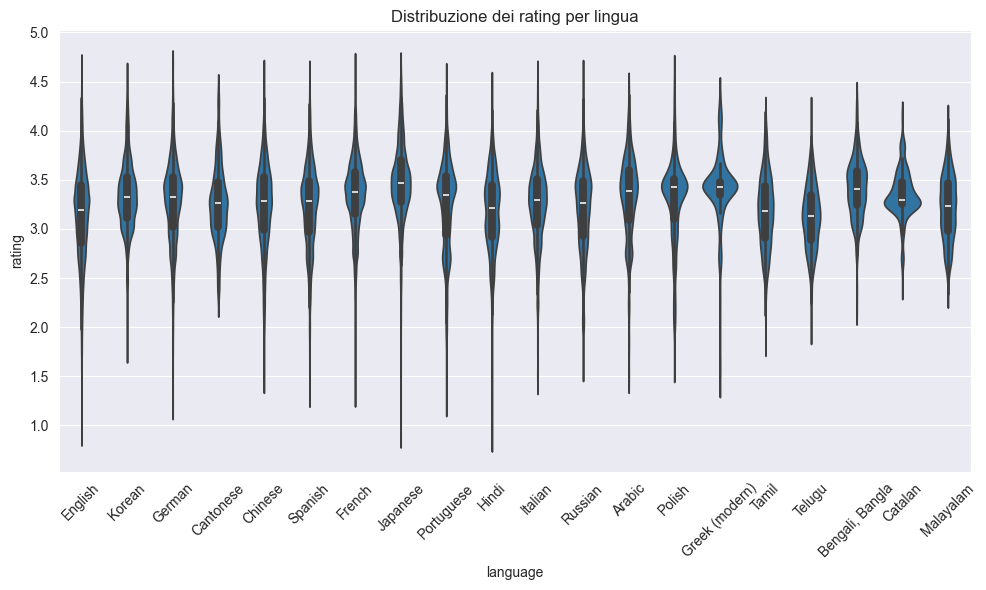

In [49]:
plt.figure(figsize=(10,6))
ax = (sns.violinplot(data=movies_w_top_20_languages, x="language", y="rating"))
plt.xticks(rotation=45)
plt.title("Distribuzione dei rating per lingua")
plt.tight_layout()

##### generi più frequenti per ciascuna lingua

In [50]:
# creo una tabella di contingenza tra la lingua dei film e il genere
genre_lang = pd.crosstab(movies_w_top_20_languages["language"], movies_w_top_20_languages["genre"])


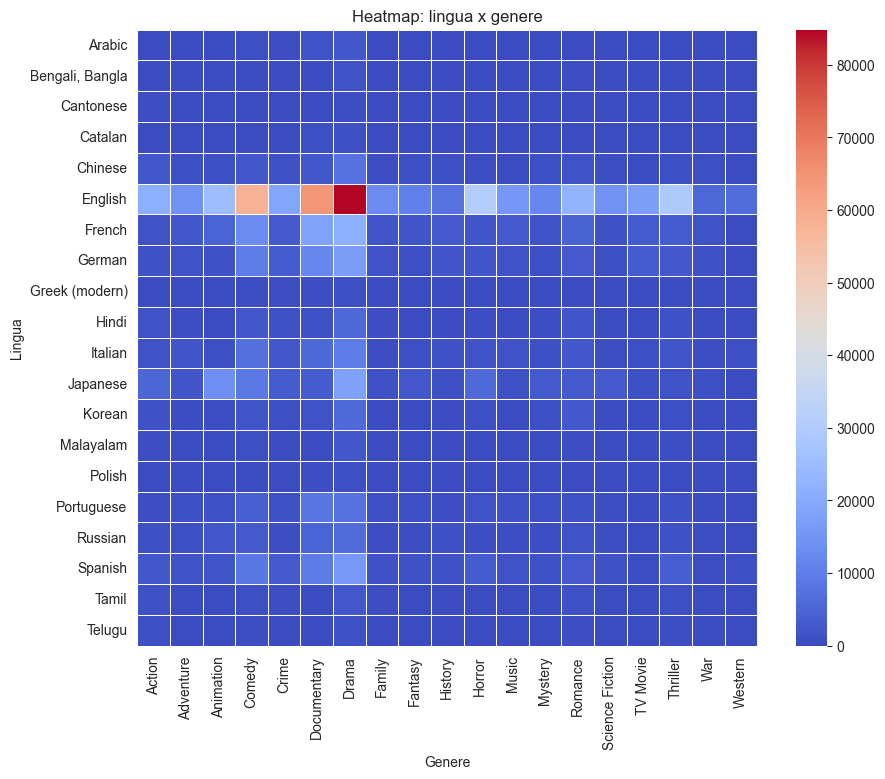

In [51]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(genre_lang, linewidths=.5, cmap = 'coolwarm')
plt.title("Heatmap: lingua x genere")
plt.xlabel("Genere")
plt.ylabel("Lingua")
plt.show()

##### evoluzione nel tempo dell'utilizzo della lingua

In [52]:

lang_year = (movies_w_top_20_languages.groupby(["language","year_range"]).size().reset_index(name="count"))


C:\Users\Domenico\AppData\Local\Temp\ipykernel_10844\3111882665.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lang_year = (movies_w_top_20_languages.groupby(["language","year_range"]).size().reset_index(name="count"))


In [53]:

fig = px.line(
    lang_year,
    x="year_range",
    y="count",
    color="language",
    hover_name="language",
    hover_data={"year_range":True, "count":True},
    labels={
        "year": "Anno",
        "count": "Numero di film",
        "language": "Lingua"
    },
    title="Evoluzione del numero di uscite per lingua"
)

fig.update_traces(mode="lines+markers")

fig.update_layout(legend_title_text="Lingua", width = 800, height = 1000)


fig.show()

### Utilizziamo il dataset studios

In [54]:
studios_df = pd.read_csv("Main_data/studios.csv")
studios_df

,id,studio
0,1000001,LuckyChap Entertainment
1,1000001,Heyday Films
2,1000001,NB/GG Pictures
3,1000001,Mattel
4,1000001,Warner Bros. Pictures
...,...,...
679278,1941596,上海猫眼影业有限公司
679279,1941596,坏小子（北京）传媒有限公司
679280,1941596,亚太国影（重庆）文化传媒有限公司
679281,1941596,凤凰传奇影业有限公司


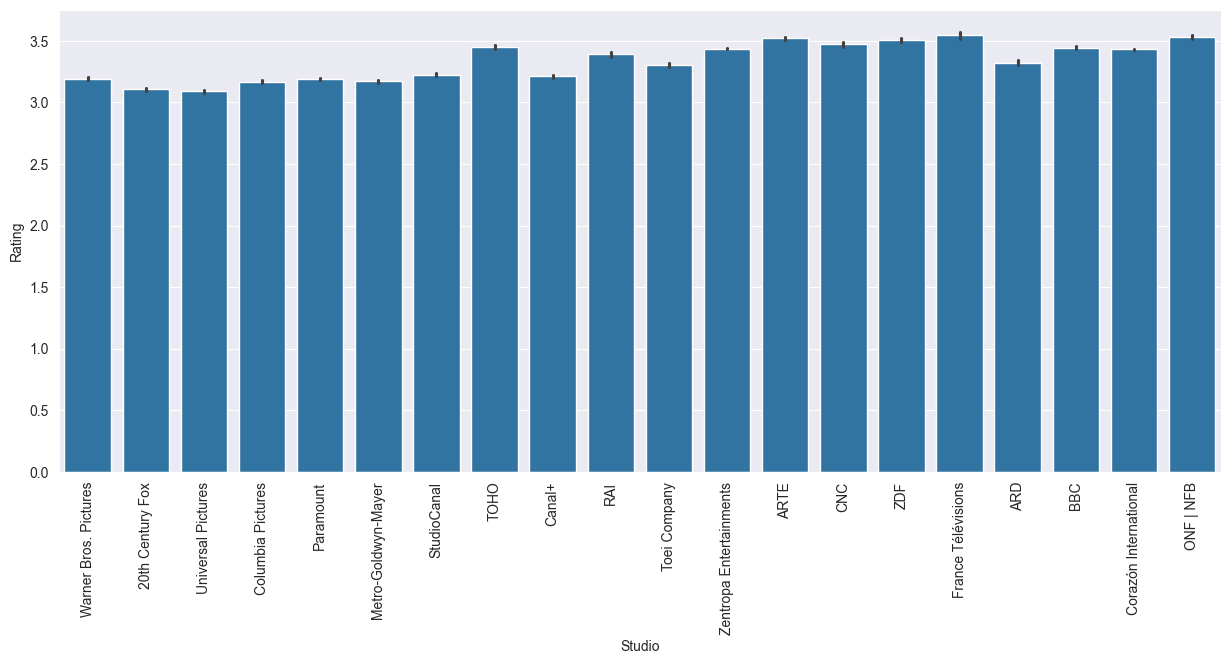

In [55]:
movies_w_studios_df = pd.merge(movies_w_top_20_languages, studios_df, on = "id")
# siccome anche gli studi di produzione sono molti, prendiamo in esame solo i primi venti per numero di produzione
top_20_studios = movies_w_studios_df["studio"].value_counts().nlargest(20)

movies_w_top_20_studios = movies_w_studios_df[movies_w_studios_df["studio"].isin(top_20_studios.index.tolist())]

plt.figure(figsize = (15, 6))
ax = sns.barplot(data = movies_w_top_20_studios, x = "studio", y = "rating")
plt.xlabel("Studio")
plt.ylabel("Rating")
plt.xticks(rotation = 90)
plt.show()



In [56]:

studio_langs = (
    movies_w_top_20_studios
    .groupby('studio')['language']
    .unique()
    .reset_index()
    .rename(columns={'language': 'languages_list'})
)

studio_langs['languages_list'] = studio_langs['languages_list'].apply(list)
studio_langs

,studio,languages_list
0,20th Century Fox,"[English, French, German, Italian, Russian, Sp..."
1,ARD,"[English, German, Greek (modern), Russian, Por..."
2,ARTE,"[English, German, Spanish, Russian, French, Po..."
3,BBC,"[English, Russian, German, Spanish, French, Ca..."
4,CNC,"[English, French, German, Portuguese, Russian,..."
5,Canal+,"[English, German, Polish, Russian, French, Chi..."
6,Columbia Pictures,"[English, Japanese, Spanish, Hindi, Italian, F..."
7,Corazón International,"[German, English, Greek (modern), Arabic, Span..."
8,France Télévisions,"[French, English, Portuguese, Italian, Korean,..."
9,Metro-Goldwyn-Mayer,"[English, Russian, Japanese, Spanish, Portugue..."


In [57]:
studio_lang_ct = pd.crosstab(
    movies_w_top_20_studios["studio"],
    movies_w_top_20_studios["language"]
)

# Per vedere solo le prime colonne (lingue) più usate
top_langs = movies_w_top_20_studios["language"].value_counts().nlargest(20).index
studio_lang_ct[top_langs]

language,English,French,German,Japanese,Italian,Spanish,Portuguese,Russian,Arabic,Polish,Greek (modern),Chinese,Cantonese,Hindi,Korean,Catalan,"Bengali, Bangla",Telugu,Malayalam,Tamil
studio,,,,,,,,,,,,,,,,,,,,
20th Century Fox,5446,301,192,144,286,287,49,114,98,14,15,92,10,12,11,0,0,0,0,0
ARD,258,144,3077,2,66,37,12,30,7,17,11,3,0,0,0,0,0,0,0,0
ARTE,2395,3650,3096,97,347,321,119,296,120,84,32,62,3,16,19,16,3,0,0,0
BBC,6943,209,202,31,58,67,33,69,29,9,6,26,2,25,5,18,0,4,0,0
CNC,676,2341,149,127,125,146,58,116,159,28,18,33,39,57,9,0,6,0,0,0
Canal+,2268,3504,362,61,422,472,122,198,134,53,26,82,40,8,12,20,4,0,2,0
Columbia Pictures,7238,330,264,99,229,439,61,140,20,19,24,95,41,37,30,0,0,0,0,0
Corazón International,796,375,442,0,375,395,375,0,10,375,387,2,0,0,0,0,0,0,0,0
France Télévisions,804,2512,206,31,105,100,52,30,19,11,14,11,0,6,2,0,0,0,0,0


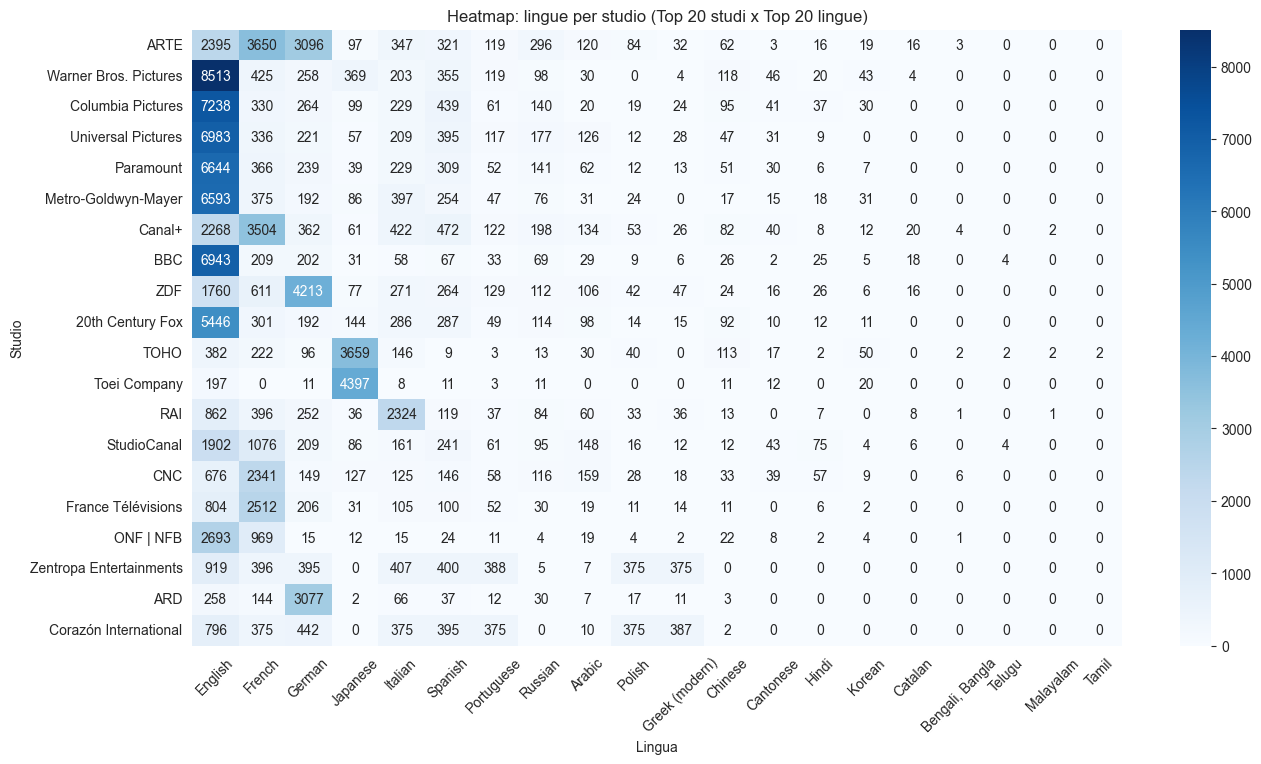

In [58]:
# Selezione primi 20 studi per numero totale di film
top_studios = movies_w_top_20_studios["studio"].value_counts().nlargest(20).index
subset_lang = studio_lang_ct.loc[top_studios, top_langs]

# con questa matrice siamo in grado di capire l'origine della casa di produzione

plt.figure(figsize=(15,8))
ax = sns.heatmap(subset_lang, annot=True, fmt="d", cmap="Blues")
plt.title("Heatmap: lingue per studio (Top 20 studi x Top 20 lingue)")
plt.xlabel("Lingua")
plt.ylabel("Studio")
plt.xticks(rotation = 45)
plt.show()

In [63]:
studio_gen_ct = pd.crosstab(
    movies_w_top_20_studios["studio"],
    movies_w_top_20_studios["genre"]
)

top_langs = movies_w_top_20_studios["genre"].value_counts().index
studio_gen_ct[top_langs]


genre,Drama,Documentary,Comedy,Romance,Action,Crime,Thriller,Adventure,TV Movie,History,Animation,Music,Science Fiction,War,Mystery,Family,Fantasy,Horror,Western
studio,,,,,,,,,,,,,,,,,,,
20th Century Fox,1199,45,1003,573,650,407,566,607,13,149,102,173,356,246,242,219,199,168,154
ARD,1089,109,762,335,32,125,108,67,669,84,0,56,15,16,29,148,18,2,0
ARTE,1311,5037,302,203,12,153,149,47,1384,1121,142,473,34,144,51,33,62,10,8
BBC,1633,2043,466,145,131,238,133,306,1072,312,88,357,318,117,150,89,61,76,1
CNC,1261,684,379,252,49,82,149,132,185,132,215,45,73,99,71,82,123,53,21
Canal+,2153,409,1144,506,371,400,609,363,113,304,156,140,89,242,146,243,193,135,74
Columbia Pictures,1497,37,1525,666,847,631,582,699,4,155,309,248,322,243,264,209,253,141,434
Corazón International,1179,1130,1160,3,0,16,0,0,0,20,0,24,0,0,0,0,0,0,0
France Télévisions,566,1471,216,75,17,156,62,28,441,330,37,116,5,118,146,79,39,1,0


##### con una matrice heatmap studiamo i generi che ogni studio di produzione ha prodotto di più

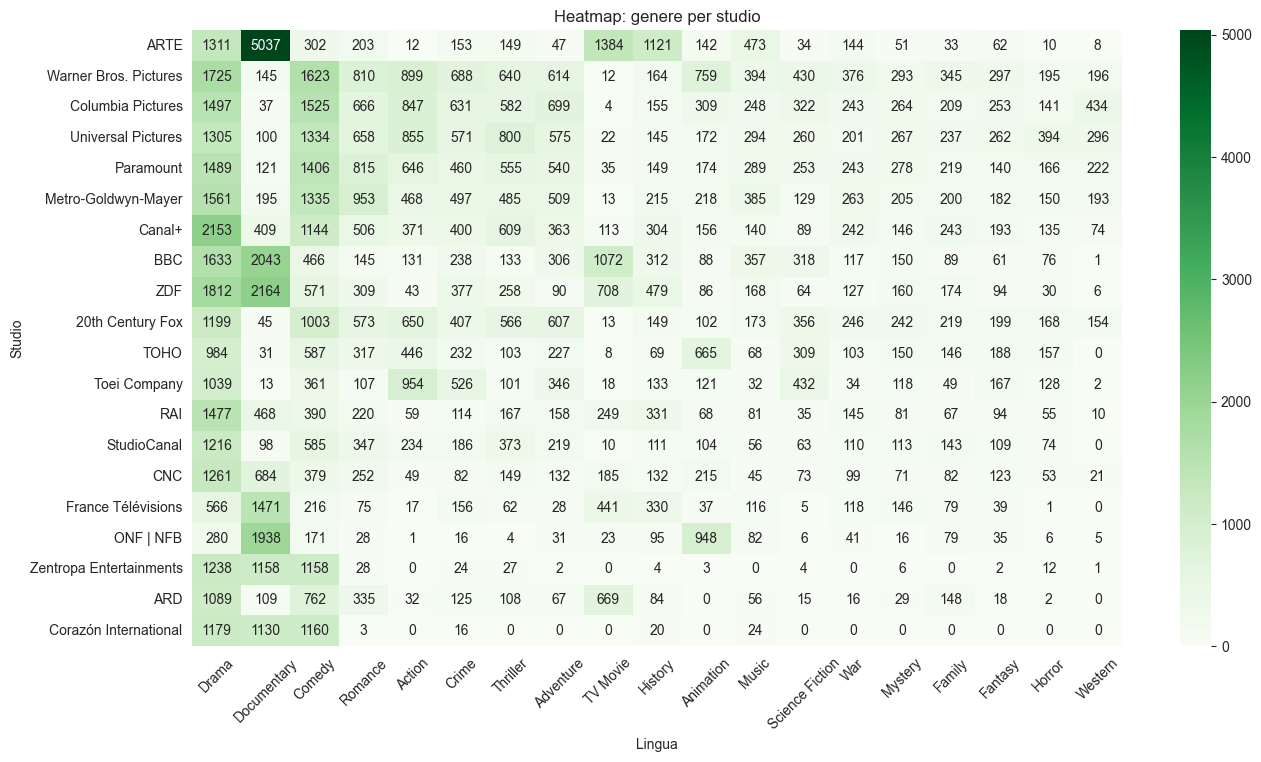

In [67]:
# Selezione primi 20 studi per numero totale di film
top_studios = movies_w_top_20_studios["studio"].value_counts().nlargest(20).index
subset_gen = studio_gen_ct.loc[top_studios, top_langs]

plt.figure(figsize=(15,8))
ax = sns.heatmap(subset_gen, annot=True, fmt="d", cmap="Greens")
plt.title("Heatmap: genere per studio")
plt.xlabel("Lingua")
plt.ylabel("Studio")
plt.xticks(rotation = 45)
plt.show()

##### provare a calcolare il rating relativo per ogni casella della heatmap